In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from matplotlib import pyplot
from keras.layers import Dense
from numpy.random import randn
from keras.models import Sequential

In [36]:
#read diabetes dataset from Google Drive
#path = "/content/drive/My Drive/Datasets/diabetes-dataset.csv"
data = pd.read_csv('german_credit_data.csv')
data2=data

**Getting the information of the diabetes dataset**

In [37]:
print(data.shape)

(1000, 21)


In [38]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [39]:
print(data.columns)

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [40]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

**Find base accuracy of the original diabetes dataset**

In [46]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cat_col=['checking_status',  'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties',
        'property_magnitude', 'other_payment_plans',
       'housing', 'job', 'own_telephone',
       'foreign_worker']

for i in cat_col:
    data[i]= le.fit_transform(data[i])


x=data[features] 
y=data['class']

In [10]:
 ## le map tracking
enc= OrdinalEncoder()    
data=data2
mapping_dict = {}
reverse_dict = {}
#data = pd.DataFrame(enc.fit_transform(data[cat_col]),columns=cat_col)

encoded_data = data.copy()
encoded_data[cat_col] = enc.fit_transform(encoded_data[cat_col])

# Get the mapping from the encoder
mapping_dict = {}
for i, col in enumerate(cat_col):
    mapping_dict[col] = dict(zip(enc.categories_[i], range(len(enc.categories_[i]))))

# Display the encoded data
print(encoded_data)
print(mapping_dict) 
        

     checking_status  duration  credit_history  purpose  credit_amount  \
0                1.0         6             1.0      6.0           1169   
1                0.0        48             3.0      6.0           5951   
2                3.0        12             1.0      2.0           2096   
3                1.0        42             3.0      3.0           7882   
4                1.0        24             2.0      4.0           4870   
..               ...       ...             ...      ...            ...   
995              3.0        12             3.0      3.0           1736   
996              1.0        30             3.0      9.0           3857   
997              3.0        12             3.0      6.0            804   
998              1.0        45             3.0      6.0           1845   
999              0.0        45             1.0      9.0           4576   

     savings_status  employment  installment_commitment  personal_status  \
0               4.0         3.0    

In [11]:
data=encoded_data

In [12]:
features = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']

label = ['class']
x = data[features]
y = data[label]

In [47]:
mapping = {'good': 1, 'bad': 0}
data['class']=data['class'].map(mapping)
y=data['class']
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: int64

In [48]:
print(x)

     checking_status  duration  credit_history  purpose  credit_amount  \
0                  1         6               1        6           1169   
1                  0        48               3        6           5951   
2                  3        12               1        2           2096   
3                  1        42               3        3           7882   
4                  1        24               2        4           4870   
..               ...       ...             ...      ...            ...   
995                3        12               3        3           1736   
996                1        30               3        9           3857   
997                3        12               3        6            804   
998                1        45               3        6           1845   
999                0        45               1        9           4576   

     savings_status  employment  installment_commitment  personal_status  \
0                 4           3    

In [49]:
print(y)

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: int64


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x_true_train, x_true_test, y_true_train, y_true_test = train_test_split(
    x, y, test_size=0.30, random_state=42)

clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(x_true_train, y_true_train)

y_true_pred = clf_true.predict(x_true_test)

print("Base Accuracy: ",
      metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report: ",
      metrics.classification_report(y_true_test, y_true_pred))

Base Accuracy:  0.7633333333333333
Base classification report:                precision    recall  f1-score   support

           0       0.71      0.37      0.49        91
           1       0.77      0.93      0.85       209

    accuracy                           0.76       300
   macro avg       0.74      0.65      0.67       300
weighted avg       0.75      0.76      0.74       300



In [51]:
x.shape

(1000, 20)

In [52]:
data.shape

(1000, 21)

In [53]:
print(y_true_test)

521    0
737    1
740    1
660    1
411    1
      ..
468    1
935    0
428    1
7      1
155    0
Name: class, Length: 300, dtype: int64


In [54]:
data = pd.concat([x,y],axis=1)
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,6,1169,4,3,4,3,2,...,3,67,1,1,2,1,1,1,1,1
1,0,48,3,6,5951,2,0,2,0,2,...,3,22,1,1,1,1,1,0,1,0
2,3,12,1,2,2096,2,1,2,3,2,...,3,49,1,1,1,3,2,0,1,1
3,1,42,3,3,7882,2,1,2,3,1,...,1,45,1,0,1,1,2,0,1,1
4,1,24,2,4,4870,2,0,3,3,2,...,2,53,1,0,2,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,3,3,1736,2,1,3,0,2,...,3,31,1,1,1,3,1,0,1,1
996,1,30,3,9,3857,2,0,4,1,2,...,1,40,1,1,1,0,1,1,1,1
997,3,12,3,6,804,2,3,4,3,2,...,0,38,1,1,1,1,1,0,1,1
998,1,45,3,6,1845,2,0,4,3,2,...,2,23,1,0,1,1,1,1,1,0


**Build a GAN neural networks**

In [55]:
# generate point in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [56]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  x = generator.predict(x_input)
  # create class labels
  y = np.zeros((n_samples, 1))
  return x,y

In [57]:
# generate n real samples with class labels
def generate_real_samples(n):
  x = data.sample(n)

  # generate class labels
  y = np.ones((n, 1))
  return x, y

In [58]:
# define the standalone generator model
from keras.layers import LeakyReLU
# define the standalone generator model
def define_generator(latent_dim, n_outputs=21):
  model = Sequential()0
  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
  model.add(Dense(30, activation='relu'))
  # model.add(Dense(n_outputs, activation='sigmoid'))
  model.add(Dense(n_outputs, activation='linear'))
  return model

In [59]:
generator1 = define_generator(10, 21)
generator1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 15)                165       
                                                                 
 dense_19 (Dense)            (None, 30)                480       
                                                                 
 dense_20 (Dense)            (None, 21)                651       
                                                                 
Total params: 1,296
Trainable params: 1,296
Non-trainable params: 0
_________________________________________________________________


In [60]:
# define the standalone discriminator model
def define_discriminator(n_inputs=21):
  model = Sequential()
  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [61]:
discriminator1 = define_discriminator(21)
discriminator1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 25)                550       
                                                                 
 dense_22 (Dense)            (None, 50)                1300      
                                                                 
 dense_23 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [62]:
# define the combined generator and disciminator model, for updating the generator
def define_gan(generator, discriminator):
  # make weights in the discriminator not trainable
  discriminator.trainable = False
  # connect them
  model = Sequential()
  # add generator
  model.add(generator)
  # add discriminator
  model.add(discriminator)
  # compile model
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

In [63]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist):
  # plot loss
  plt.subplot(1, 1, 1)
  plt.plot(d_hist, label='d')
  plt.plot(g_hist, label='gen')
  plt.show()
  # plt.savefig('results_baseline/plot_line_plot_loss.png')
  plt.close()

In [64]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=8000, n_batch=128):
  
  # determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch / 2)

  d_history = []
  g_history = []
  
  # manually enumerate epochs
  for epoch in range(n_epochs):
    # prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator
    d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
    d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    
    # create inverted labels for the fake samples
    y_gan = np.ones((n_batch, 1))
    
    # update the generator via the discriminator's error
    g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)

    print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))
    d_history.append(d_loss)
    g_history.append(g_loss_fake)

  plot_history(d_history, g_history)

  g_model.save('trained_generated_model_20210205_v3.h5')

In [65]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=1000):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
  # scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], color='red')
	pyplot.scatter(x_fake[:, 0], color='blue')
	pyplot.show()

2/2 [==============================] - 1s 20ms/step
>1, d1=554.495, d2=0.864 d=277.680 g=0.568
2/2 [==============================] - 0s 4ms/step
>2, d1=498.155, d2=0.861 d=249.508 g=0.560
2/2 [==============================] - 0s 2ms/step
>3, d1=344.554, d2=0.878 d=172.716 g=0.562
2/2 [==============================] - 0s 8ms/step
>4, d1=318.518, d2=0.824 d=159.671 g=0.564
2/2 [==============================] - 0s 10ms/step
>5, d1=181.944, d2=0.843 d=91.393 g=0.567
2/2 [==============================] - 0s 10ms/step
>6, d1=186.463, d2=0.863 d=93.663 g=0.571
2/2 [==============================] - 0s 23ms/step
>7, d1=88.799, d2=0.841 d=44.820 g=0.579
2/2 [==============================] - 0s 0s/step
>8, d1=18.530, d2=0.866 d=9.698 g=0.577
2/2 [==============================] - 0s 0s/step
>9, d1=0.000, d2=0.874 d=0.437 g=0.577
2/2 [==============================] - 0s 0s/step
>10, d1=0.000, d2=0.831 d=0.416 g=0.607
2/2 [==============================] - 0s 11ms/step
>11, d1=0.000, d2=0.8

2/2 [==============================] - 0s 0s/step
>180, d1=0.000, d2=0.188 d=0.094 g=1.813
2/2 [==============================] - 0s 0s/step
>181, d1=0.000, d2=0.182 d=0.091 g=1.839
2/2 [==============================] - 0s 0s/step
>182, d1=0.000, d2=0.177 d=0.089 g=1.822
2/2 [==============================] - 0s 0s/step
>183, d1=0.000, d2=0.186 d=0.093 g=1.818
2/2 [==============================] - 0s 0s/step
>184, d1=0.000, d2=0.187 d=0.094 g=1.787
2/2 [==============================] - 0s 3ms/step
>185, d1=0.000, d2=0.187 d=0.093 g=1.778
2/2 [==============================] - 0s 0s/step
>186, d1=0.002, d2=0.189 d=0.096 g=1.765
2/2 [==============================] - 0s 0s/step
>187, d1=0.000, d2=0.194 d=0.097 g=1.785
2/2 [==============================] - 0s 16ms/step
>188, d1=0.000, d2=0.195 d=0.098 g=1.758
2/2 [==============================] - 0s 16ms/step
>189, d1=0.000, d2=0.190 d=0.095 g=1.755
2/2 [==============================] - 0s 0s/step
>190, d1=0.000, d2=0.201 d=0.101 g=

2/2 [==============================] - 0s 0s/step
>358, d1=0.000, d2=0.046 d=0.023 g=3.357
2/2 [==============================] - 0s 1ms/step
>359, d1=0.007, d2=0.042 d=0.025 g=3.318
2/2 [==============================] - 0s 0s/step
>360, d1=0.000, d2=0.043 d=0.022 g=3.380
2/2 [==============================] - 0s 16ms/step
>361, d1=0.000, d2=0.040 d=0.020 g=3.363
2/2 [==============================] - 0s 4ms/step
>362, d1=0.000, d2=0.039 d=0.020 g=3.382
2/2 [==============================] - 0s 0s/step
>363, d1=0.000, d2=0.035 d=0.018 g=3.402
2/2 [==============================] - 0s 0s/step
>364, d1=0.000, d2=0.036 d=0.018 g=3.476
2/2 [==============================] - 0s 4ms/step
>365, d1=0.000, d2=0.035 d=0.018 g=3.542
2/2 [==============================] - 0s 0s/step
>366, d1=0.000, d2=0.033 d=0.016 g=3.526
2/2 [==============================] - 0s 0s/step
>367, d1=0.000, d2=0.034 d=0.017 g=3.511
2/2 [==============================] - 0s 0s/step
>368, d1=0.000, d2=0.031 d=0.016 g=

2/2 [==============================] - 0s 0s/step
>536, d1=0.000, d2=0.037 d=0.018 g=3.723
2/2 [==============================] - 0s 0s/step
>537, d1=0.000, d2=0.034 d=0.017 g=3.674
2/2 [==============================] - 0s 8ms/step
>538, d1=0.000, d2=0.029 d=0.015 g=3.807
2/2 [==============================] - 0s 7ms/step
>539, d1=0.000, d2=0.038 d=0.019 g=3.900
2/2 [==============================] - 0s 6ms/step
>540, d1=0.000, d2=0.031 d=0.015 g=4.006
2/2 [==============================] - 0s 4ms/step
>541, d1=0.012, d2=0.023 d=0.018 g=4.129
2/2 [==============================] - 0s 2ms/step
>542, d1=0.000, d2=0.022 d=0.011 g=4.214
2/2 [==============================] - 0s 2ms/step
>543, d1=0.027, d2=0.024 d=0.026 g=4.336
2/2 [==============================] - 0s 3ms/step
>544, d1=0.000, d2=0.023 d=0.011 g=4.254
2/2 [==============================] - 0s 1ms/step
>545, d1=0.000, d2=0.023 d=0.012 g=4.334
2/2 [==============================] - 0s 3ms/step
>546, d1=0.000, d2=0.018 d=0.00

2/2 [==============================] - 0s 3ms/step
>714, d1=0.000, d2=0.027 d=0.014 g=4.316
2/2 [==============================] - 0s 4ms/step
>715, d1=0.000, d2=0.014 d=0.007 g=4.845
2/2 [==============================] - 0s 4ms/step
>716, d1=0.000, d2=0.007 d=0.004 g=5.434
2/2 [==============================] - 0s 3ms/step
>717, d1=0.000, d2=0.006 d=0.003 g=5.673
2/2 [==============================] - 0s 0s/step
>718, d1=0.000, d2=0.005 d=0.002 g=5.835
2/2 [==============================] - 0s 4ms/step
>719, d1=0.000, d2=0.004 d=0.002 g=5.818
2/2 [==============================] - 0s 4ms/step
>720, d1=0.000, d2=0.005 d=0.002 g=5.677
2/2 [==============================] - 0s 4ms/step
>721, d1=0.000, d2=0.007 d=0.003 g=5.487
2/2 [==============================] - 0s 4ms/step
>722, d1=0.000, d2=0.008 d=0.004 g=5.092
2/2 [==============================] - 0s 5ms/step
>723, d1=0.000, d2=0.011 d=0.006 g=4.747
2/2 [==============================] - 0s 8ms/step
>724, d1=0.000, d2=0.015 d=0.0

2/2 [==============================] - 0s 0s/step
>892, d1=0.000, d2=0.027 d=0.013 g=3.871
2/2 [==============================] - 0s 0s/step
>893, d1=0.002, d2=0.026 d=0.014 g=3.964
2/2 [==============================] - 0s 0s/step
>894, d1=0.085, d2=0.030 d=0.057 g=3.896
2/2 [==============================] - 0s 3ms/step
>895, d1=0.000, d2=0.033 d=0.017 g=3.931
2/2 [==============================] - 0s 0s/step
>896, d1=0.019, d2=0.033 d=0.026 g=3.756
2/2 [==============================] - 0s 0s/step
>897, d1=0.005, d2=0.035 d=0.020 g=3.520
2/2 [==============================] - 0s 3ms/step
>898, d1=0.024, d2=0.048 d=0.036 g=3.355
2/2 [==============================] - 0s 0s/step
>899, d1=0.000, d2=0.047 d=0.024 g=3.301
2/2 [==============================] - 0s 0s/step
>900, d1=0.000, d2=0.054 d=0.027 g=3.297
2/2 [==============================] - 0s 1ms/step
>901, d1=0.089, d2=0.053 d=0.071 g=3.235
2/2 [==============================] - 0s 0s/step
>902, d1=0.000, d2=0.053 d=0.026 g=3.

>1069, d1=0.000, d2=0.034 d=0.017 g=3.653
2/2 [==============================] - 0s 3ms/step
>1070, d1=0.000, d2=0.032 d=0.016 g=3.666
2/2 [==============================] - 0s 0s/step
>1071, d1=0.000, d2=0.031 d=0.016 g=3.805
2/2 [==============================] - 0s 0s/step
>1072, d1=0.001, d2=0.033 d=0.017 g=3.852
2/2 [==============================] - 0s 3ms/step
>1073, d1=0.000, d2=0.026 d=0.013 g=3.967
2/2 [==============================] - 0s 0s/step
>1074, d1=0.004, d2=0.021 d=0.013 g=4.134
2/2 [==============================] - 0s 13ms/step
>1075, d1=0.000, d2=0.022 d=0.011 g=4.270
2/2 [==============================] - 0s 0s/step
>1076, d1=0.014, d2=0.023 d=0.019 g=4.261
2/2 [==============================] - 0s 0s/step
>1077, d1=0.001, d2=0.018 d=0.009 g=4.270
2/2 [==============================] - 0s 2ms/step
>1078, d1=0.002, d2=0.017 d=0.009 g=4.437
2/2 [==============================] - 0s 4ms/step
>1079, d1=0.036, d2=0.016 d=0.026 g=4.298
2/2 [===========================

2/2 [==============================] - 0s 3ms/step
>1246, d1=0.000, d2=0.027 d=0.013 g=4.834
2/2 [==============================] - 0s 0s/step
>1247, d1=0.000, d2=0.023 d=0.012 g=4.950
2/2 [==============================] - 0s 0s/step
>1248, d1=0.000, d2=0.011 d=0.005 g=5.234
2/2 [==============================] - 0s 0s/step
>1249, d1=0.043, d2=0.009 d=0.026 g=5.349
2/2 [==============================] - 0s 0s/step
>1250, d1=0.000, d2=0.008 d=0.004 g=5.482
2/2 [==============================] - 0s 0s/step
>1251, d1=0.001, d2=0.007 d=0.004 g=5.559
2/2 [==============================] - 0s 16ms/step
>1252, d1=0.000, d2=0.010 d=0.005 g=5.399
2/2 [==============================] - 0s 0s/step
>1253, d1=0.000, d2=0.008 d=0.004 g=5.511
2/2 [==============================] - 0s 3ms/step
>1254, d1=0.037, d2=0.011 d=0.024 g=5.119
2/2 [==============================] - 0s 0s/step
>1255, d1=0.000, d2=0.023 d=0.011 g=5.149
2/2 [==============================] - 0s 0s/step
>1256, d1=0.011, d2=0.013 

2/2 [==============================] - 0s 4ms/step
>1335, d1=0.000, d2=0.005 d=0.003 g=5.787
2/2 [==============================] - 0s 5ms/step
>1336, d1=0.002, d2=0.007 d=0.004 g=5.601
2/2 [==============================] - 0s 0s/step
>1337, d1=0.009, d2=0.007 d=0.008 g=5.465
2/2 [==============================] - 0s 3ms/step
>1338, d1=0.007, d2=0.008 d=0.008 g=5.366
2/2 [==============================] - 0s 0s/step
>1339, d1=0.000, d2=0.016 d=0.008 g=5.397
2/2 [==============================] - 0s 0s/step
>1340, d1=0.000, d2=0.007 d=0.004 g=5.636
2/2 [==============================] - 0s 0s/step
>1341, d1=0.000, d2=0.008 d=0.004 g=6.019
2/2 [==============================] - 0s 0s/step
>1342, d1=0.002, d2=0.005 d=0.003 g=6.211
2/2 [==============================] - 0s 1ms/step
>1343, d1=0.002, d2=0.004 d=0.003 g=6.213
2/2 [==============================] - 0s 0s/step
>1344, d1=0.002, d2=0.004 d=0.003 g=6.117
2/2 [==============================] - 0s 16ms/step
>1345, d1=0.001, d2=0.00

2/2 [==============================] - 0s 16ms/step
>1511, d1=0.103, d2=0.013 d=0.058 g=4.344
2/2 [==============================] - 0s 4ms/step
>1512, d1=0.002, d2=0.014 d=0.008 g=4.233
2/2 [==============================] - 0s 4ms/step
>1513, d1=0.064, d2=0.018 d=0.041 g=4.139
2/2 [==============================] - 0s 4ms/step
>1514, d1=0.000, d2=0.018 d=0.009 g=4.131
2/2 [==============================] - 0s 8ms/step
>1515, d1=0.000, d2=0.017 d=0.009 g=4.256
2/2 [==============================] - 0s 4ms/step
>1516, d1=0.000, d2=0.015 d=0.008 g=4.391
2/2 [==============================] - 0s 0s/step
>1517, d1=0.000, d2=0.013 d=0.007 g=4.499
2/2 [==============================] - 0s 0s/step
>1518, d1=0.002, d2=0.011 d=0.006 g=4.680
2/2 [==============================] - 0s 10ms/step
>1519, d1=0.000, d2=0.009 d=0.004 g=4.895
2/2 [==============================] - 0s 5ms/step
>1520, d1=0.001, d2=0.007 d=0.004 g=5.063
2/2 [==============================] - 0s 4ms/step
>1521, d1=0.003, d2

2/2 [==============================] - 0s 0s/step
>1687, d1=0.012, d2=0.019 d=0.015 g=4.775
2/2 [==============================] - 0s 0s/step
>1688, d1=0.004, d2=0.032 d=0.018 g=5.016
2/2 [==============================] - 0s 16ms/step
>1689, d1=0.113, d2=0.016 d=0.064 g=5.448
2/2 [==============================] - 0s 2ms/step
>1690, d1=0.001, d2=0.008 d=0.005 g=5.972
2/2 [==============================] - 0s 16ms/step
>1691, d1=0.149, d2=0.008 d=0.078 g=5.766
2/2 [==============================] - 0s 16ms/step
>1692, d1=0.270, d2=0.023 d=0.146 g=4.907
2/2 [==============================] - 0s 3ms/step
>1693, d1=0.037, d2=0.066 d=0.051 g=5.205
2/2 [==============================] - 0s 7ms/step
>1694, d1=0.099, d2=0.014 d=0.057 g=5.401
2/2 [==============================] - 0s 0s/step
>1695, d1=0.108, d2=0.043 d=0.075 g=5.827
2/2 [==============================] - 0s 4ms/step
>1696, d1=0.133, d2=0.016 d=0.074 g=6.766
2/2 [==============================] - 0s 16ms/step
>1697, d1=0.000, d

2/2 [==============================] - 0s 0s/step
>1863, d1=0.056, d2=0.018 d=0.037 g=5.351
2/2 [==============================] - 0s 3ms/step
>1864, d1=0.072, d2=0.031 d=0.051 g=5.406
2/2 [==============================] - 0s 5ms/step
>1865, d1=0.007, d2=0.010 d=0.009 g=5.895
2/2 [==============================] - 0s 13ms/step
>1866, d1=0.000, d2=0.014 d=0.007 g=6.314
2/2 [==============================] - 0s 12ms/step
>1867, d1=0.000, d2=0.005 d=0.003 g=6.575
2/2 [==============================] - 0s 5ms/step
>1868, d1=0.033, d2=0.009 d=0.021 g=6.690
2/2 [==============================] - 0s 6ms/step
>1869, d1=0.038, d2=0.009 d=0.023 g=6.441
2/2 [==============================] - 0s 6ms/step
>1870, d1=0.053, d2=0.008 d=0.031 g=6.338
2/2 [==============================] - 0s 0s/step
>1871, d1=0.000, d2=0.011 d=0.005 g=6.410
2/2 [==============================] - 0s 19ms/step
>1872, d1=0.000, d2=0.009 d=0.005 g=6.367
2/2 [==============================] - 0s 5ms/step
>1873, d1=0.000, d

2/2 [==============================] - 0s 3ms/step
>2039, d1=0.000, d2=0.019 d=0.010 g=5.350
2/2 [==============================] - 0s 0s/step
>2040, d1=0.010, d2=0.012 d=0.011 g=5.522
2/2 [==============================] - 0s 6ms/step
>2041, d1=0.000, d2=0.011 d=0.006 g=5.813
2/2 [==============================] - 0s 0s/step
>2042, d1=0.212, d2=0.014 d=0.113 g=5.766
2/2 [==============================] - 0s 16ms/step
>2043, d1=0.000, d2=0.010 d=0.005 g=5.944
2/2 [==============================] - 0s 4ms/step
>2044, d1=0.271, d2=0.013 d=0.142 g=5.556
2/2 [==============================] - 0s 4ms/step
>2045, d1=0.002, d2=0.010 d=0.006 g=5.395
2/2 [==============================] - 0s 4ms/step
>2046, d1=0.095, d2=0.016 d=0.055 g=5.238
2/2 [==============================] - 0s 8ms/step
>2047, d1=0.001, d2=0.015 d=0.008 g=5.290
2/2 [==============================] - 0s 4ms/step
>2048, d1=0.133, d2=0.018 d=0.075 g=5.602
2/2 [==============================] - 0s 3ms/step
>2049, d1=0.067, d2=

2/2 [==============================] - 0s 3ms/step
>2215, d1=0.147, d2=0.212 d=0.180 g=6.952
2/2 [==============================] - 0s 7ms/step
>2216, d1=0.434, d2=0.013 d=0.223 g=8.232
2/2 [==============================] - 0s 2ms/step
>2217, d1=2.356, d2=0.361 d=1.359 g=2.918
2/2 [==============================] - 0s 4ms/step
>2218, d1=0.081, d2=3.188 d=1.635 g=1.621
2/2 [==============================] - 0s 0s/step
>2219, d1=0.072, d2=1.929 d=1.001 g=4.872
2/2 [==============================] - 0s 13ms/step
>2220, d1=1.217, d2=0.272 d=0.745 g=7.477
2/2 [==============================] - 0s 0s/step
>2221, d1=8.916, d2=9.442 d=9.179 g=0.000
2/2 [==============================] - 0s 0s/step
>2222, d1=0.000, d2=24.252 d=12.126 g=0.000
2/2 [==============================] - 0s 0s/step
>2223, d1=0.000, d2=29.983 d=14.992 g=0.000
2/2 [==============================] - 0s 16ms/step
>2224, d1=0.000, d2=27.102 d=13.551 g=0.000
2/2 [==============================] - 0s 5ms/step
>2225, d1=0.000

2/2 [==============================] - 0s 16ms/step
>2303, d1=0.208, d2=0.058 d=0.133 g=4.739
2/2 [==============================] - 0s 3ms/step
>2304, d1=0.361, d2=0.060 d=0.210 g=4.674
2/2 [==============================] - 0s 2ms/step
>2305, d1=0.208, d2=0.034 d=0.121 g=5.040
2/2 [==============================] - 0s 4ms/step
>2306, d1=0.317, d2=0.076 d=0.196 g=4.756
2/2 [==============================] - 0s 8ms/step
>2307, d1=0.225, d2=0.114 d=0.170 g=4.415
2/2 [==============================] - 0s 3ms/step
>2308, d1=0.268, d2=0.153 d=0.211 g=4.375
2/2 [==============================] - 0s 0s/step
>2309, d1=0.035, d2=0.136 d=0.086 g=4.700
2/2 [==============================] - 0s 3ms/step
>2310, d1=0.284, d2=0.118 d=0.201 g=4.719
2/2 [==============================] - 0s 8ms/step
>2311, d1=0.219, d2=0.112 d=0.166 g=4.659
2/2 [==============================] - 0s 10ms/step
>2312, d1=0.153, d2=0.092 d=0.123 g=5.011
2/2 [==============================] - 0s 0s/step
>2313, d1=0.360, d2

2/2 [==============================] - 0s 2ms/step
>2479, d1=0.042, d2=0.011 d=0.026 g=5.122
2/2 [==============================] - 0s 2ms/step
>2480, d1=0.137, d2=0.008 d=0.073 g=4.972
2/2 [==============================] - 0s 0s/step
>2481, d1=0.000, d2=0.012 d=0.006 g=4.888
2/2 [==============================] - 0s 0s/step
>2482, d1=0.020, d2=0.016 d=0.018 g=4.771
2/2 [==============================] - 0s 0s/step
>2483, d1=0.044, d2=0.017 d=0.031 g=4.688
2/2 [==============================] - 0s 5ms/step
>2484, d1=0.043, d2=0.032 d=0.038 g=4.428
2/2 [==============================] - 0s 0s/step
>2485, d1=0.126, d2=0.025 d=0.075 g=4.461
2/2 [==============================] - 0s 16ms/step
>2486, d1=0.135, d2=0.022 d=0.078 g=4.420
2/2 [==============================] - 0s 3ms/step
>2487, d1=0.010, d2=0.015 d=0.012 g=4.563
2/2 [==============================] - 0s 16ms/step
>2488, d1=0.041, d2=0.014 d=0.028 g=4.653
2/2 [==============================] - 0s 0s/step
>2489, d1=0.005, d2=0.

2/2 [==============================] - 0s 5ms/step
>2655, d1=0.231, d2=0.024 d=0.127 g=6.396
2/2 [==============================] - 0s 5ms/step
>2656, d1=1.029, d2=1.505 d=1.267 g=1.256
2/2 [==============================] - 0s 0s/step
>2657, d1=0.002, d2=2.001 d=1.002 g=4.011
2/2 [==============================] - 0s 0s/step
>2658, d1=0.001, d2=0.002 d=0.002 g=11.176
2/2 [==============================] - 0s 0s/step
>2659, d1=0.114, d2=0.000 d=0.057 g=15.210
2/2 [==============================] - 0s 16ms/step
>2660, d1=0.256, d2=0.000 d=0.128 g=16.823
2/2 [==============================] - 0s 0s/step
>2661, d1=0.348, d2=0.000 d=0.174 g=16.245
2/2 [==============================] - 0s 13ms/step
>2662, d1=0.511, d2=0.000 d=0.255 g=13.642
2/2 [==============================] - 0s 3ms/step
>2663, d1=0.166, d2=0.000 d=0.083 g=10.112
2/2 [==============================] - 0s 0s/step
>2664, d1=0.019, d2=0.000 d=0.009 g=7.912
2/2 [==============================] - 0s 0s/step
>2665, d1=0.308, 

2/2 [==============================] - 0s 12ms/step
>2831, d1=0.273, d2=0.030 d=0.151 g=4.442
2/2 [==============================] - 0s 4ms/step
>2832, d1=0.045, d2=0.017 d=0.031 g=4.636
2/2 [==============================] - 0s 7ms/step
>2833, d1=0.049, d2=0.017 d=0.033 g=4.726
2/2 [==============================] - 0s 4ms/step
>2834, d1=0.348, d2=0.020 d=0.184 g=4.411
2/2 [==============================] - 0s 6ms/step
>2835, d1=0.012, d2=0.023 d=0.017 g=4.435
2/2 [==============================] - 0s 5ms/step
>2836, d1=0.011, d2=0.027 d=0.019 g=4.577
2/2 [==============================] - 0s 4ms/step
>2837, d1=0.314, d2=0.026 d=0.170 g=4.155
2/2 [==============================] - 0s 4ms/step
>2838, d1=0.065, d2=0.037 d=0.051 g=4.042
2/2 [==============================] - 0s 5ms/step
>2839, d1=0.347, d2=0.053 d=0.200 g=4.075
2/2 [==============================] - 0s 6ms/step
>2840, d1=0.090, d2=0.040 d=0.065 g=4.191
2/2 [==============================] - 0s 5ms/step
>2841, d1=0.024, d

2/2 [==============================] - 0s 3ms/step
>3007, d1=0.088, d2=0.075 d=0.082 g=3.830
2/2 [==============================] - 0s 1ms/step
>3008, d1=0.118, d2=0.097 d=0.107 g=4.506
2/2 [==============================] - 0s 0s/step
>3009, d1=0.075, d2=0.030 d=0.052 g=4.936
2/2 [==============================] - 0s 0s/step
>3010, d1=0.103, d2=0.026 d=0.065 g=4.774
2/2 [==============================] - 0s 2ms/step
>3011, d1=0.165, d2=0.058 d=0.112 g=4.381
2/2 [==============================] - 0s 0s/step
>3012, d1=0.320, d2=0.209 d=0.264 g=4.277
2/2 [==============================] - 0s 7ms/step
>3013, d1=0.229, d2=0.046 d=0.137 g=4.230
2/2 [==============================] - 0s 7ms/step
>3014, d1=0.181, d2=0.107 d=0.144 g=4.312
2/2 [==============================] - 0s 5ms/step
>3015, d1=0.416, d2=0.181 d=0.299 g=3.861
2/2 [==============================] - 0s 4ms/step
>3016, d1=0.349, d2=0.232 d=0.290 g=4.274
2/2 [==============================] - 0s 5ms/step
>3017, d1=0.406, d2=0.

2/2 [==============================] - 0s 3ms/step
>3095, d1=0.170, d2=0.004 d=0.087 g=6.262
2/2 [==============================] - 0s 0s/step
>3096, d1=0.130, d2=0.040 d=0.085 g=4.903
2/2 [==============================] - 0s 0s/step
>3097, d1=0.036, d2=0.094 d=0.065 g=4.021
2/2 [==============================] - 0s 4ms/step
>3098, d1=0.083, d2=0.219 d=0.151 g=4.794
2/2 [==============================] - 0s 6ms/step
>3099, d1=0.240, d2=0.021 d=0.131 g=6.196
2/2 [==============================] - 0s 4ms/step
>3100, d1=0.203, d2=0.010 d=0.107 g=6.323
2/2 [==============================] - 0s 3ms/step
>3101, d1=0.198, d2=0.020 d=0.109 g=5.224
2/2 [==============================] - 0s 0s/step
>3102, d1=0.130, d2=0.082 d=0.106 g=4.030
2/2 [==============================] - 0s 3ms/step
>3103, d1=0.263, d2=0.212 d=0.237 g=3.454
2/2 [==============================] - 0s 0s/step
>3104, d1=0.307, d2=0.169 d=0.238 g=4.478
2/2 [==============================] - 0s 0s/step
>3105, d1=0.354, d2=0.08

2/2 [==============================] - 0s 0s/step
>3271, d1=0.164, d2=0.066 d=0.115 g=5.160
2/2 [==============================] - 0s 5ms/step
>3272, d1=0.341, d2=0.051 d=0.196 g=5.866
2/2 [==============================] - 0s 0s/step
>3273, d1=0.246, d2=0.020 d=0.133 g=5.612
2/2 [==============================] - 0s 8ms/step
>3274, d1=0.197, d2=0.083 d=0.140 g=5.953
2/2 [==============================] - 0s 8ms/step
>3275, d1=0.334, d2=0.032 d=0.183 g=6.099
2/2 [==============================] - 0s 0s/step
>3276, d1=0.225, d2=0.044 d=0.134 g=5.515
2/2 [==============================] - 0s 5ms/step
>3277, d1=0.409, d2=0.176 d=0.293 g=5.214
2/2 [==============================] - 0s 6ms/step
>3278, d1=0.284, d2=0.059 d=0.171 g=5.684
2/2 [==============================] - 0s 2ms/step
>3279, d1=0.895, d2=0.197 d=0.546 g=4.729
2/2 [==============================] - 0s 16ms/step
>3280, d1=0.228, d2=0.027 d=0.127 g=5.157
2/2 [==============================] - 0s 3ms/step
>3281, d1=0.127, d2=0

2/2 [==============================] - 0s 16ms/step
>3447, d1=0.760, d2=0.000 d=0.380 g=11.173
2/2 [==============================] - 0s 0s/step
>3448, d1=0.509, d2=0.000 d=0.255 g=7.297
2/2 [==============================] - 0s 0s/step
>3449, d1=0.688, d2=0.084 d=0.386 g=3.155
2/2 [==============================] - 0s 4ms/step
>3450, d1=0.038, d2=0.930 d=0.484 g=5.404
2/2 [==============================] - 0s 0s/step
>3451, d1=0.103, d2=0.000 d=0.052 g=12.081
2/2 [==============================] - 0s 3ms/step
>3452, d1=0.487, d2=0.000 d=0.244 g=15.814
2/2 [==============================] - 0s 4ms/step
>3453, d1=0.828, d2=0.000 d=0.414 g=16.240
2/2 [==============================] - 0s 0s/step
>3454, d1=0.806, d2=0.000 d=0.403 g=13.692
2/2 [==============================] - 0s 0s/step
>3455, d1=0.424, d2=0.000 d=0.212 g=9.775
2/2 [==============================] - 0s 4ms/step
>3456, d1=0.481, d2=0.004 d=0.243 g=4.817
2/2 [==============================] - 0s 0s/step
>3457, d1=0.034, d2

>3622, d1=0.606, d2=1.242 d=0.924 g=6.863
2/2 [==============================] - 0s 0s/step
>3623, d1=0.955, d2=0.000 d=0.478 g=12.561
2/2 [==============================] - 0s 0s/step
>3624, d1=0.785, d2=0.000 d=0.393 g=12.541
2/2 [==============================] - 0s 0s/step
>3625, d1=0.924, d2=0.002 d=0.463 g=6.277
2/2 [==============================] - 0s 3ms/step
>3626, d1=0.167, d2=0.639 d=0.403 g=5.862
2/2 [==============================] - 0s 6ms/step
>3627, d1=0.985, d2=0.007 d=0.496 g=8.226
2/2 [==============================] - 0s 3ms/step
>3628, d1=0.612, d2=0.004 d=0.308 g=8.442
2/2 [==============================] - 0s 15ms/step
>3629, d1=0.894, d2=0.013 d=0.453 g=5.399
2/2 [==============================] - 0s 0s/step
>3630, d1=0.300, d2=0.363 d=0.332 g=5.202
2/2 [==============================] - 0s 4ms/step
>3631, d1=0.849, d2=0.029 d=0.439 g=6.752
2/2 [==============================] - 0s 2ms/step
>3632, d1=0.510, d2=0.008 d=0.259 g=6.684
2/2 [========================

2/2 [==============================] - 0s 8ms/step
>3711, d1=0.191, d2=0.138 d=0.164 g=6.202
2/2 [==============================] - 0s 7ms/step
>3712, d1=0.158, d2=0.034 d=0.096 g=6.821
2/2 [==============================] - 0s 995us/step
>3713, d1=0.150, d2=0.028 d=0.089 g=6.188
2/2 [==============================] - 0s 2ms/step
>3714, d1=0.165, d2=0.083 d=0.124 g=5.567
2/2 [==============================] - 0s 7ms/step
>3715, d1=0.172, d2=0.089 d=0.130 g=5.695
2/2 [==============================] - 0s 5ms/step
>3716, d1=0.102, d2=0.101 d=0.101 g=6.626
2/2 [==============================] - 0s 8ms/step
>3717, d1=0.311, d2=0.030 d=0.171 g=6.839
2/2 [==============================] - 0s 4ms/step
>3718, d1=0.445, d2=0.029 d=0.237 g=5.407
2/2 [==============================] - 0s 7ms/step
>3719, d1=0.278, d2=0.239 d=0.258 g=4.686
2/2 [==============================] - 0s 17ms/step
>3720, d1=0.466, d2=0.232 d=0.349 g=6.625
2/2 [==============================] - 0s 0s/step
>3721, d1=0.374, 

2/2 [==============================] - 0s 0s/step
>3799, d1=0.000, d2=0.000 d=0.000 g=8.733
2/2 [==============================] - 0s 0s/step
>3800, d1=0.000, d2=0.008 d=0.004 g=4.065
2/2 [==============================] - 0s 16ms/step
>3801, d1=0.000, d2=0.734 d=0.367 g=5.492
2/2 [==============================] - 0s 0s/step
>3802, d1=0.000, d2=0.001 d=0.000 g=11.313
2/2 [==============================] - 0s 0s/step
>3803, d1=0.000, d2=0.000 d=0.000 g=15.443
2/2 [==============================] - 0s 0s/step
>3804, d1=0.116, d2=0.000 d=0.058 g=18.191
2/2 [==============================] - 0s 10ms/step
>3805, d1=0.001, d2=0.000 d=0.000 g=19.570
2/2 [==============================] - 0s 6ms/step
>3806, d1=0.106, d2=0.000 d=0.053 g=20.218
2/2 [==============================] - 0s 4ms/step
>3807, d1=0.059, d2=0.000 d=0.029 g=19.933
2/2 [==============================] - 0s 4ms/step
>3808, d1=0.130, d2=0.000 d=0.065 g=19.068
2/2 [==============================] - 0s 16ms/step
>3809, d1=0.01

2/2 [==============================] - 0s 0s/step
>3975, d1=0.225, d2=0.001 d=0.113 g=12.475
2/2 [==============================] - 0s 0s/step
>3976, d1=1.414, d2=0.000 d=0.707 g=11.151
2/2 [==============================] - 0s 4ms/step
>3977, d1=0.305, d2=0.001 d=0.153 g=8.465
2/2 [==============================] - 0s 3ms/step
>3978, d1=0.138, d2=0.018 d=0.078 g=5.677
2/2 [==============================] - 0s 0s/step
>3979, d1=0.491, d2=0.195 d=0.343 g=5.663
2/2 [==============================] - 0s 0s/step
>3980, d1=0.261, d2=0.013 d=0.137 g=7.276
2/2 [==============================] - 0s 0s/step
>3981, d1=0.286, d2=0.008 d=0.147 g=7.532
2/2 [==============================] - 0s 0s/step
>3982, d1=0.631, d2=0.017 d=0.324 g=6.034
2/2 [==============================] - 0s 0s/step
>3983, d1=0.325, d2=0.345 d=0.335 g=6.973
2/2 [==============================] - 0s 16ms/step
>3984, d1=0.458, d2=0.006 d=0.232 g=8.582
2/2 [==============================] - 0s 16ms/step
>3985, d1=1.794, d2=0.

2/2 [==============================] - 0s 6ms/step
>4151, d1=0.484, d2=0.000 d=0.242 g=31.998
2/2 [==============================] - 0s 7ms/step
>4152, d1=0.035, d2=0.000 d=0.018 g=22.787
2/2 [==============================] - 0s 6ms/step
>4153, d1=0.001, d2=0.000 d=0.000 g=17.167
2/2 [==============================] - 0s 16ms/step
>4154, d1=0.009, d2=0.000 d=0.004 g=11.316
2/2 [==============================] - 0s 4ms/step
>4155, d1=0.305, d2=0.002 d=0.154 g=5.978
2/2 [==============================] - 0s 8ms/step
>4156, d1=0.000, d2=0.340 d=0.170 g=5.073
2/2 [==============================] - 0s 2ms/step
>4157, d1=0.008, d2=0.034 d=0.021 g=8.164
2/2 [==============================] - 0s 8ms/step
>4158, d1=0.089, d2=0.002 d=0.045 g=9.580
2/2 [==============================] - 0s 0s/step
>4159, d1=0.001, d2=0.001 d=0.001 g=9.809
2/2 [==============================] - 0s 0s/step
>4160, d1=0.000, d2=0.001 d=0.001 g=9.060
2/2 [==============================] - 0s 0s/step
>4161, d1=0.408, 

2/2 [==============================] - 0s 16ms/step
>4327, d1=0.392, d2=0.228 d=0.310 g=3.490
2/2 [==============================] - 0s 3ms/step
>4328, d1=0.137, d2=0.154 d=0.146 g=5.047
2/2 [==============================] - 0s 0s/step
>4329, d1=0.392, d2=0.030 d=0.211 g=6.282
2/2 [==============================] - 0s 16ms/step
>4330, d1=0.291, d2=0.012 d=0.151 g=6.068
2/2 [==============================] - 0s 0s/step
>4331, d1=0.410, d2=0.040 d=0.225 g=4.721
2/2 [==============================] - 0s 16ms/step
>4332, d1=0.252, d2=0.288 d=0.270 g=5.212
2/2 [==============================] - 0s 4ms/step
>4333, d1=0.109, d2=0.026 d=0.067 g=7.115
2/2 [==============================] - 0s 3ms/step
>4334, d1=0.441, d2=0.006 d=0.224 g=6.873
2/2 [==============================] - 0s 0s/step
>4335, d1=0.401, d2=0.046 d=0.224 g=4.912
2/2 [==============================] - 0s 4ms/step
>4336, d1=0.312, d2=0.573 d=0.442 g=6.230
2/2 [==============================] - 0s 0s/step
>4337, d1=0.573, d2=

2/2 [==============================] - 0s 4ms/step
>4415, d1=0.035, d2=0.028 d=0.031 g=4.417
2/2 [==============================] - 0s 0s/step
>4416, d1=0.110, d2=0.043 d=0.076 g=4.265
2/2 [==============================] - 0s 5ms/step
>4417, d1=0.011, d2=0.037 d=0.024 g=4.546
2/2 [==============================] - 0s 3ms/step
>4418, d1=0.355, d2=0.033 d=0.194 g=4.709
2/2 [==============================] - 0s 12ms/step
>4419, d1=0.018, d2=0.019 d=0.019 g=4.742
2/2 [==============================] - 0s 9ms/step
>4420, d1=0.221, d2=0.023 d=0.122 g=5.079
2/2 [==============================] - 0s 0s/step
>4421, d1=0.258, d2=0.025 d=0.142 g=4.615
2/2 [==============================] - 0s 9ms/step
>4422, d1=0.075, d2=0.042 d=0.058 g=4.390
2/2 [==============================] - 0s 8ms/step
>4423, d1=0.069, d2=0.036 d=0.052 g=4.352
2/2 [==============================] - 0s 3ms/step
>4424, d1=0.211, d2=0.038 d=0.124 g=4.322
2/2 [==============================] - 0s 3ms/step
>4425, d1=0.333, d2=

>4590, d1=2.611, d2=1.959 d=2.285 g=6.848
2/2 [==============================] - 0s 0s/step
>4591, d1=2.136, d2=0.405 d=1.271 g=8.039
2/2 [==============================] - 0s 8ms/step
>4592, d1=3.866, d2=1.916 d=2.891 g=5.271
2/2 [==============================] - 0s 10ms/step
>4593, d1=3.059, d2=3.365 d=3.212 g=5.078
2/2 [==============================] - 0s 0s/step
>4594, d1=2.046, d2=0.588 d=1.317 g=9.852
2/2 [==============================] - 0s 10ms/step
>4595, d1=6.051, d2=2.547 d=4.299 g=2.226
2/2 [==============================] - 0s 2ms/step
>4596, d1=1.215, d2=4.315 d=2.765 g=6.755
2/2 [==============================] - 0s 4ms/step
>4597, d1=4.232, d2=0.244 d=2.238 g=7.256
2/2 [==============================] - 0s 2ms/step
>4598, d1=4.264, d2=2.634 d=3.449 g=4.633
2/2 [==============================] - 0s 8ms/step
>4599, d1=1.998, d2=0.911 d=1.454 g=7.547
2/2 [==============================] - 0s 3ms/step
>4600, d1=3.376, d2=0.025 d=1.701 g=7.135
2/2 [=======================

2/2 [==============================] - 0s 0s/step
>4679, d1=0.395, d2=0.007 d=0.201 g=6.503
2/2 [==============================] - 0s 0s/step
>4680, d1=0.495, d2=0.008 d=0.252 g=5.730
2/2 [==============================] - 0s 4ms/step
>4681, d1=0.256, d2=0.035 d=0.146 g=5.257
2/2 [==============================] - 0s 3ms/step
>4682, d1=0.347, d2=0.087 d=0.217 g=4.869
2/2 [==============================] - 0s 3ms/step
>4683, d1=0.653, d2=0.133 d=0.393 g=5.673
2/2 [==============================] - 0s 16ms/step
>4684, d1=0.132, d2=0.014 d=0.073 g=7.383
2/2 [==============================] - 0s 13ms/step
>4685, d1=0.324, d2=0.004 d=0.164 g=7.055
2/2 [==============================] - 0s 7ms/step
>4686, d1=0.831, d2=0.019 d=0.425 g=5.810
2/2 [==============================] - 0s 10ms/step
>4687, d1=0.536, d2=0.062 d=0.299 g=4.590
2/2 [==============================] - 0s 0s/step
>4688, d1=0.019, d2=0.157 d=0.088 g=5.512
2/2 [==============================] - 0s 0s/step
>4689, d1=0.217, d2=

2/2 [==============================] - 0s 3ms/step
>4855, d1=0.550, d2=0.149 d=0.349 g=4.974
2/2 [==============================] - 0s 0s/step
>4856, d1=0.250, d2=0.035 d=0.142 g=5.864
2/2 [==============================] - 0s 3ms/step
>4857, d1=0.390, d2=0.035 d=0.212 g=5.479
2/2 [==============================] - 0s 0s/step
>4858, d1=0.658, d2=0.082 d=0.370 g=4.762
2/2 [==============================] - 0s 0s/step
>4859, d1=0.317, d2=0.096 d=0.206 g=4.379
2/2 [==============================] - 0s 0s/step
>4860, d1=0.234, d2=0.098 d=0.166 g=4.586
2/2 [==============================] - 0s 0s/step
>4861, d1=0.227, d2=0.113 d=0.170 g=5.357
2/2 [==============================] - 0s 0s/step
>4862, d1=0.208, d2=0.090 d=0.149 g=5.952
2/2 [==============================] - 0s 5ms/step
>4863, d1=0.315, d2=0.037 d=0.176 g=5.537
2/2 [==============================] - 0s 4ms/step
>4864, d1=0.442, d2=0.078 d=0.260 g=4.560
2/2 [==============================] - 0s 16ms/step
>4865, d1=0.257, d2=0.17

2/2 [==============================] - 0s 5ms/step
>5031, d1=0.766, d2=0.184 d=0.475 g=3.989
2/2 [==============================] - 0s 10ms/step
>5032, d1=0.423, d2=0.207 d=0.315 g=5.471
2/2 [==============================] - 0s 7ms/step
>5033, d1=0.932, d2=0.132 d=0.532 g=5.886
2/2 [==============================] - 0s 0s/step
>5034, d1=0.393, d2=0.073 d=0.233 g=5.874
2/2 [==============================] - 0s 0s/step
>5035, d1=0.474, d2=0.054 d=0.264 g=5.324
2/2 [==============================] - 0s 5ms/step
>5036, d1=0.192, d2=0.182 d=0.187 g=6.156
2/2 [==============================] - 0s 0s/step
>5037, d1=0.090, d2=0.010 d=0.050 g=7.983
2/2 [==============================] - 0s 15ms/step
>5038, d1=0.323, d2=0.004 d=0.163 g=8.061
2/2 [==============================] - 0s 0s/step
>5039, d1=0.394, d2=0.002 d=0.198 g=7.007
2/2 [==============================] - 0s 0s/step
>5040, d1=0.383, d2=0.011 d=0.197 g=5.744
2/2 [==============================] - 0s 0s/step
>5041, d1=0.139, d2=0.0

2/2 [==============================] - 0s 0s/step
>5119, d1=0.024, d2=0.237 d=0.131 g=6.993
2/2 [==============================] - 0s 7ms/step
>5120, d1=0.029, d2=0.016 d=0.022 g=8.500
2/2 [==============================] - 0s 3ms/step
>5121, d1=0.199, d2=0.003 d=0.101 g=9.406
2/2 [==============================] - 0s 3ms/step
>5122, d1=0.325, d2=0.002 d=0.164 g=8.285
2/2 [==============================] - 0s 12ms/step
>5123, d1=0.177, d2=0.007 d=0.092 g=6.351
2/2 [==============================] - 0s 0s/step
>5124, d1=0.272, d2=0.211 d=0.242 g=5.460
2/2 [==============================] - 0s 0s/step
>5125, d1=0.227, d2=0.046 d=0.137 g=6.018
2/2 [==============================] - 0s 0s/step
>5126, d1=0.068, d2=0.031 d=0.049 g=6.510
2/2 [==============================] - 0s 6ms/step
>5127, d1=0.130, d2=0.041 d=0.085 g=6.228
2/2 [==============================] - 0s 4ms/step
>5128, d1=0.207, d2=0.099 d=0.153 g=5.614
2/2 [==============================] - 0s 0s/step
>5129, d1=0.404, d2=0.0

2/2 [==============================] - 0s 4ms/step
>5295, d1=1.741, d2=0.030 d=0.886 g=5.732
2/2 [==============================] - 0s 0s/step
>5296, d1=2.042, d2=0.238 d=1.140 g=2.631
2/2 [==============================] - 0s 0s/step
>5297, d1=1.785, d2=1.645 d=1.715 g=3.556
2/2 [==============================] - 0s 18ms/step
>5298, d1=1.817, d2=0.023 d=0.920 g=6.383
2/2 [==============================] - 0s 0s/step
>5299, d1=2.200, d2=0.080 d=1.140 g=2.253
2/2 [==============================] - 0s 3ms/step
>5300, d1=1.224, d2=1.991 d=1.607 g=3.523
2/2 [==============================] - 0s 4ms/step
>5301, d1=2.299, d2=0.107 d=1.203 g=4.859
2/2 [==============================] - 0s 5ms/step
>5302, d1=1.648, d2=0.182 d=0.915 g=3.827
2/2 [==============================] - 0s 3ms/step
>5303, d1=1.607, d2=0.740 d=1.174 g=4.413
2/2 [==============================] - 0s 8ms/step
>5304, d1=2.078, d2=0.065 d=1.071 g=4.725
2/2 [==============================] - 0s 0s/step
>5305, d1=2.573, d2=0.

2/2 [==============================] - 0s 0s/step
>5471, d1=0.513, d2=0.095 d=0.304 g=3.693
2/2 [==============================] - 0s 2ms/step
>5472, d1=0.679, d2=0.177 d=0.428 g=3.860
2/2 [==============================] - 0s 8ms/step
>5473, d1=0.694, d2=0.086 d=0.390 g=4.171
2/2 [==============================] - 0s 9ms/step
>5474, d1=0.299, d2=0.053 d=0.176 g=4.253
2/2 [==============================] - 0s 4ms/step
>5475, d1=0.504, d2=0.064 d=0.284 g=3.671
2/2 [==============================] - 0s 5ms/step
>5476, d1=0.743, d2=0.139 d=0.441 g=3.209
2/2 [==============================] - 0s 4ms/step
>5477, d1=0.403, d2=0.169 d=0.286 g=3.921
2/2 [==============================] - 0s 0s/step
>5478, d1=0.729, d2=0.085 d=0.407 g=4.954
2/2 [==============================] - 0s 4ms/step
>5479, d1=0.340, d2=0.017 d=0.179 g=4.865
2/2 [==============================] - 0s 0s/step
>5480, d1=0.524, d2=0.059 d=0.291 g=4.015
2/2 [==============================] - 0s 8ms/step
>5481, d1=0.395, d2=0.

2/2 [==============================] - 0s 0s/step
>5647, d1=0.173, d2=0.000 d=0.086 g=15.263
2/2 [==============================] - 0s 0s/step
>5648, d1=0.286, d2=0.000 d=0.143 g=18.734
2/2 [==============================] - 0s 0s/step
>5649, d1=1.195, d2=0.000 d=0.598 g=17.015
2/2 [==============================] - 0s 12ms/step
>5650, d1=0.389, d2=0.000 d=0.195 g=12.964
2/2 [==============================] - 0s 4ms/step
>5651, d1=0.227, d2=0.001 d=0.114 g=7.229
2/2 [==============================] - 0s 0s/step
>5652, d1=0.187, d2=0.299 d=0.243 g=5.853
2/2 [==============================] - 0s 2ms/step
>5653, d1=0.011, d2=0.012 d=0.012 g=8.420
2/2 [==============================] - 0s 2ms/step
>5654, d1=0.238, d2=0.003 d=0.121 g=8.476
2/2 [==============================] - 0s 3ms/step
>5655, d1=0.602, d2=0.055 d=0.329 g=4.322
2/2 [==============================] - 0s 3ms/step
>5656, d1=0.418, d2=0.687 d=0.553 g=7.718
2/2 [==============================] - 0s 0s/step
>5657, d1=1.555, d2

2/2 [==============================] - 0s 3ms/step
>5735, d1=0.816, d2=0.631 d=0.724 g=4.578
2/2 [==============================] - 0s 0s/step
>5736, d1=0.170, d2=0.023 d=0.097 g=6.810
2/2 [==============================] - 0s 8ms/step
>5737, d1=0.762, d2=0.036 d=0.399 g=5.331
2/2 [==============================] - 0s 6ms/step
>5738, d1=0.425, d2=0.150 d=0.288 g=4.257
2/2 [==============================] - 0s 6ms/step
>5739, d1=0.329, d2=0.364 d=0.346 g=4.641
2/2 [==============================] - 0s 16ms/step
>5740, d1=0.510, d2=0.180 d=0.345 g=6.385
2/2 [==============================] - 0s 4ms/step
>5741, d1=0.886, d2=0.108 d=0.497 g=5.375
2/2 [==============================] - 0s 16ms/step
>5742, d1=0.918, d2=0.603 d=0.761 g=3.784
2/2 [==============================] - 0s 3ms/step
>5743, d1=0.816, d2=0.817 d=0.817 g=5.919
2/2 [==============================] - 0s 3ms/step
>5744, d1=2.221, d2=1.322 d=1.772 g=3.303
2/2 [==============================] - 0s 0s/step
>5745, d1=1.072, d2

2/2 [==============================] - 0s 3ms/step
>5911, d1=0.617, d2=0.012 d=0.314 g=7.728
2/2 [==============================] - 0s 8ms/step
>5912, d1=0.749, d2=0.010 d=0.379 g=6.473
2/2 [==============================] - 0s 12ms/step
>5913, d1=0.509, d2=0.165 d=0.337 g=6.611
2/2 [==============================] - 0s 0s/step
>5914, d1=0.269, d2=0.016 d=0.143 g=8.037
2/2 [==============================] - 0s 0s/step
>5915, d1=0.363, d2=0.007 d=0.185 g=8.463
2/2 [==============================] - 0s 8ms/step
>5916, d1=0.429, d2=0.011 d=0.220 g=6.887
2/2 [==============================] - 0s 4ms/step
>5917, d1=0.155, d2=0.082 d=0.119 g=6.393
2/2 [==============================] - 0s 2ms/step
>5918, d1=0.140, d2=0.020 d=0.080 g=6.715
2/2 [==============================] - 0s 0s/step
>5919, d1=0.157, d2=0.013 d=0.085 g=6.644
2/2 [==============================] - 0s 16ms/step
>5920, d1=0.039, d2=0.010 d=0.024 g=6.224
2/2 [==============================] - 0s 5ms/step
>5921, d1=0.228, d2=

2/2 [==============================] - 0s 0s/step
>6087, d1=0.788, d2=0.184 d=0.486 g=3.873
2/2 [==============================] - 0s 0s/step
>6088, d1=0.860, d2=0.109 d=0.484 g=4.495
2/2 [==============================] - 0s 5ms/step
>6089, d1=1.428, d2=0.115 d=0.772 g=3.858
2/2 [==============================] - 0s 0s/step
>6090, d1=1.354, d2=0.365 d=0.859 g=3.616
2/2 [==============================] - 0s 0s/step
>6091, d1=0.785, d2=0.138 d=0.461 g=5.042
2/2 [==============================] - 0s 0s/step
>6092, d1=0.663, d2=0.029 d=0.346 g=5.190
2/2 [==============================] - 0s 4ms/step
>6093, d1=0.911, d2=0.096 d=0.504 g=3.569
2/2 [==============================] - 0s 4ms/step
>6094, d1=0.505, d2=0.326 d=0.415 g=4.155
2/2 [==============================] - 0s 0s/step
>6095, d1=0.845, d2=0.067 d=0.456 g=4.598
2/2 [==============================] - 0s 0s/step
>6096, d1=0.878, d2=0.122 d=0.500 g=4.004
2/2 [==============================] - 0s 4ms/step
>6097, d1=1.044, d2=0.152 

2/2 [==============================] - 0s 10ms/step
>6263, d1=0.437, d2=0.001 d=0.219 g=5.031
2/2 [==============================] - 0s 0s/step
>6264, d1=0.279, d2=0.293 d=0.286 g=3.162
2/2 [==============================] - 0s 4ms/step
>6265, d1=0.131, d2=0.085 d=0.108 g=5.573
2/2 [==============================] - 0s 7ms/step
>6266, d1=0.207, d2=0.006 d=0.106 g=7.608
2/2 [==============================] - 0s 0s/step
>6267, d1=0.144, d2=0.003 d=0.073 g=7.444
2/2 [==============================] - 0s 16ms/step
>6268, d1=0.184, d2=0.005 d=0.094 g=5.944
2/2 [==============================] - 0s 0s/step
>6269, d1=0.221, d2=0.014 d=0.118 g=4.628
2/2 [==============================] - 0s 0s/step
>6270, d1=0.204, d2=0.080 d=0.142 g=3.829
2/2 [==============================] - 0s 3ms/step
>6271, d1=0.230, d2=0.080 d=0.155 g=4.322
2/2 [==============================] - 0s 16ms/step
>6272, d1=0.149, d2=0.038 d=0.094 g=5.218
2/2 [==============================] - 0s 0s/step
>6273, d1=0.201, d2=0

2/2 [==============================] - 0s 7ms/step
>6439, d1=1.098, d2=0.219 d=0.658 g=2.981
2/2 [==============================] - 0s 8ms/step
>6440, d1=0.882, d2=0.590 d=0.736 g=2.503
2/2 [==============================] - 0s 0s/step
>6441, d1=0.934, d2=0.991 d=0.962 g=2.548
2/2 [==============================] - 0s 10ms/step
>6442, d1=1.460, d2=1.088 d=1.274 g=2.421
2/2 [==============================] - 0s 0s/step
>6443, d1=1.572, d2=1.342 d=1.457 g=2.350
2/2 [==============================] - 0s 17ms/step
>6444, d1=0.944, d2=0.743 d=0.844 g=3.530
2/2 [==============================] - 0s 0s/step
>6445, d1=1.947, d2=1.574 d=1.761 g=1.898
2/2 [==============================] - 0s 3ms/step
>6446, d1=0.521, d2=0.485 d=0.503 g=4.154
2/2 [==============================] - 0s 16ms/step
>6447, d1=1.641, d2=0.549 d=1.095 g=2.048
2/2 [==============================] - 0s 0s/step
>6448, d1=0.622, d2=0.696 d=0.659 g=3.113
2/2 [==============================] - 0s 0s/step
>6449, d1=0.666, d2=0

2/2 [==============================] - 0s 10ms/step
>6615, d1=1.204, d2=1.265 d=1.234 g=2.850
2/2 [==============================] - 0s 7ms/step
>6616, d1=0.750, d2=0.272 d=0.511 g=4.841
2/2 [==============================] - 0s 0s/step
>6617, d1=1.836, d2=0.331 d=1.084 g=2.206
2/2 [==============================] - 0s 9ms/step
>6618, d1=0.416, d2=1.072 d=0.744 g=3.490
2/2 [==============================] - 0s 12ms/step
>6619, d1=0.634, d2=0.046 d=0.340 g=5.727
2/2 [==============================] - 0s 0s/step
>6620, d1=2.464, d2=2.558 d=2.511 g=0.568
2/2 [==============================] - 0s 0s/step
>6621, d1=0.310, d2=1.592 d=0.951 g=3.582
2/2 [==============================] - 0s 0s/step
>6622, d1=0.645, d2=0.005 d=0.325 g=8.931
2/2 [==============================] - 0s 16ms/step
>6623, d1=2.112, d2=0.003 d=1.057 g=5.414
2/2 [==============================] - 0s 6ms/step
>6624, d1=0.271, d2=0.246 d=0.259 g=2.380
2/2 [==============================] - 0s 0s/step
>6625, d1=0.288, d2=0

2/2 [==============================] - 0s 14ms/step
>6791, d1=0.206, d2=1.962 d=1.084 g=2.872
2/2 [==============================] - 0s 0s/step
>6792, d1=0.199, d2=0.012 d=0.106 g=8.144
2/2 [==============================] - 0s 6ms/step
>6793, d1=0.314, d2=0.000 d=0.157 g=10.925
2/2 [==============================] - 0s 4ms/step
>6794, d1=1.073, d2=0.000 d=0.537 g=7.628
2/2 [==============================] - 0s 5ms/step
>6795, d1=0.667, d2=0.045 d=0.356 g=2.008
2/2 [==============================] - 0s 3ms/step
>6796, d1=0.205, d2=1.861 d=1.033 g=2.662
2/2 [==============================] - 0s 3ms/step
>6797, d1=0.358, d2=0.018 d=0.188 g=7.545
2/2 [==============================] - 0s 3ms/step
>6798, d1=1.942, d2=0.014 d=0.978 g=3.547
2/2 [==============================] - 0s 0s/step
>6799, d1=0.818, d2=1.116 d=0.967 g=2.687
2/2 [==============================] - 0s 2ms/step
>6800, d1=0.712, d2=0.101 d=0.407 g=4.872
2/2 [==============================] - 0s 0s/step
>6801, d1=1.285, d2=

2/2 [==============================] - 0s 0s/step
>6967, d1=0.496, d2=0.050 d=0.273 g=4.653
2/2 [==============================] - 0s 0s/step
>6968, d1=0.474, d2=0.074 d=0.274 g=4.078
2/2 [==============================] - 0s 3ms/step
>6969, d1=0.604, d2=0.061 d=0.333 g=3.847
2/2 [==============================] - 0s 0s/step
>6970, d1=0.271, d2=0.036 d=0.154 g=4.529
2/2 [==============================] - 0s 0s/step
>6971, d1=0.250, d2=0.039 d=0.145 g=4.509
2/2 [==============================] - 0s 0s/step
>6972, d1=0.219, d2=0.039 d=0.129 g=4.417
2/2 [==============================] - 0s 0s/step
>6973, d1=0.118, d2=0.062 d=0.090 g=4.436
2/2 [==============================] - 0s 3ms/step
>6974, d1=0.107, d2=0.051 d=0.079 g=4.517
2/2 [==============================] - 0s 0s/step
>6975, d1=0.126, d2=0.041 d=0.084 g=4.742
2/2 [==============================] - 0s 2ms/step
>6976, d1=0.393, d2=0.051 d=0.222 g=4.755
2/2 [==============================] - 0s 10ms/step
>6977, d1=0.152, d2=0.069

>7142, d1=1.267, d2=0.225 d=0.746 g=2.974
2/2 [==============================] - 0s 0s/step
>7143, d1=0.672, d2=0.360 d=0.516 g=3.409
2/2 [==============================] - 0s 10ms/step
>7144, d1=0.839, d2=0.194 d=0.517 g=3.682
2/2 [==============================] - 0s 16ms/step
>7145, d1=0.924, d2=0.254 d=0.589 g=3.694
2/2 [==============================] - 0s 0s/step
>7146, d1=0.870, d2=0.246 d=0.558 g=3.776
2/2 [==============================] - 0s 0s/step
>7147, d1=0.858, d2=0.271 d=0.564 g=4.546
2/2 [==============================] - 0s 0s/step
>7148, d1=0.658, d2=0.080 d=0.369 g=4.397
2/2 [==============================] - 0s 10ms/step
>7149, d1=0.515, d2=0.171 d=0.343 g=4.102
2/2 [==============================] - 0s 0s/step
>7150, d1=0.673, d2=0.257 d=0.465 g=5.365
2/2 [==============================] - 0s 0s/step
>7151, d1=0.915, d2=0.027 d=0.471 g=5.342
2/2 [==============================] - 0s 3ms/step
>7152, d1=0.650, d2=0.158 d=0.404 g=3.646
2/2 [==========================

2/2 [==============================] - 0s 5ms/step
>7231, d1=1.056, d2=0.223 d=0.640 g=2.566
2/2 [==============================] - 0s 4ms/step
>7232, d1=0.970, d2=0.374 d=0.672 g=2.474
2/2 [==============================] - 0s 0s/step
>7233, d1=0.513, d2=0.220 d=0.366 g=3.074
2/2 [==============================] - 0s 11ms/step
>7234, d1=0.876, d2=0.190 d=0.533 g=2.451
2/2 [==============================] - 0s 0s/step
>7235, d1=0.898, d2=0.664 d=0.781 g=2.184
2/2 [==============================] - 0s 8ms/step
>7236, d1=1.493, d2=0.542 d=1.017 g=2.389
2/2 [==============================] - 0s 4ms/step
>7237, d1=1.926, d2=0.723 d=1.324 g=1.970
2/2 [==============================] - 0s 5ms/step
>7238, d1=1.366, d2=0.940 d=1.153 g=1.973
2/2 [==============================] - 0s 5ms/step
>7239, d1=1.731, d2=0.963 d=1.347 g=2.284
2/2 [==============================] - 0s 3ms/step
>7240, d1=1.799, d2=0.775 d=1.287 g=1.694
2/2 [==============================] - 0s 10ms/step
>7241, d1=1.860, d2

2/2 [==============================] - 0s 0s/step
>7407, d1=0.604, d2=0.149 d=0.377 g=2.914
2/2 [==============================] - 0s 0s/step
>7408, d1=0.448, d2=0.291 d=0.370 g=3.298
2/2 [==============================] - 0s 0s/step
>7409, d1=0.673, d2=0.138 d=0.406 g=3.091
2/2 [==============================] - 0s 0s/step
>7410, d1=0.745, d2=0.682 d=0.714 g=3.339
2/2 [==============================] - 0s 0s/step
>7411, d1=0.889, d2=0.247 d=0.568 g=2.960
2/2 [==============================] - 0s 16ms/step
>7412, d1=1.072, d2=0.864 d=0.968 g=2.860
2/2 [==============================] - 0s 16ms/step
>7413, d1=1.071, d2=0.453 d=0.762 g=2.703
2/2 [==============================] - 0s 3ms/step
>7414, d1=0.540, d2=0.389 d=0.464 g=3.285
2/2 [==============================] - 0s 0s/step
>7415, d1=0.635, d2=0.230 d=0.432 g=2.869
2/2 [==============================] - 0s 0s/step
>7416, d1=0.522, d2=0.303 d=0.412 g=3.187
2/2 [==============================] - 0s 4ms/step
>7417, d1=0.539, d2=0.13

2/2 [==============================] - 0s 15ms/step
>7583, d1=1.283, d2=0.474 d=0.878 g=2.765
2/2 [==============================] - 0s 0s/step
>7584, d1=1.222, d2=0.722 d=0.972 g=2.542
2/2 [==============================] - 0s 0s/step
>7585, d1=1.830, d2=1.157 d=1.493 g=2.711
2/2 [==============================] - 0s 0s/step
>7586, d1=2.357, d2=2.387 d=2.372 g=2.225
2/2 [==============================] - 0s 5ms/step
>7587, d1=1.130, d2=0.183 d=0.656 g=4.858
2/2 [==============================] - 0s 2ms/step
>7588, d1=0.726, d2=0.019 d=0.372 g=5.029
2/2 [==============================] - 0s 3ms/step
>7589, d1=1.030, d2=0.109 d=0.569 g=3.297
2/2 [==============================] - 0s 5ms/step
>7590, d1=0.587, d2=0.470 d=0.529 g=3.537
2/2 [==============================] - 0s 0s/step
>7591, d1=0.324, d2=0.044 d=0.184 g=5.686
2/2 [==============================] - 0s 3ms/step
>7592, d1=0.269, d2=0.008 d=0.138 g=6.641
2/2 [==============================] - 0s 2ms/step
>7593, d1=0.240, d2=0.

>7759, d1=0.154, d2=0.099 d=0.127 g=3.418
2/2 [==============================] - 0s 16ms/step
>7760, d1=0.457, d2=0.086 d=0.271 g=3.279
2/2 [==============================] - 0s 0s/step
>7761, d1=0.349, d2=0.125 d=0.237 g=3.249
2/2 [==============================] - 0s 5ms/step
>7762, d1=0.316, d2=0.117 d=0.216 g=3.427
2/2 [==============================] - 0s 16ms/step
>7763, d1=0.510, d2=0.156 d=0.333 g=2.988
2/2 [==============================] - 0s 0s/step
>7764, d1=0.522, d2=0.196 d=0.359 g=3.059
2/2 [==============================] - 0s 0s/step
>7765, d1=0.364, d2=0.124 d=0.244 g=3.381
2/2 [==============================] - 0s 0s/step
>7766, d1=0.338, d2=0.103 d=0.220 g=3.260
2/2 [==============================] - 0s 16ms/step
>7767, d1=0.242, d2=0.111 d=0.176 g=3.321
2/2 [==============================] - 0s 0s/step
>7768, d1=0.390, d2=0.166 d=0.278 g=2.985
2/2 [==============================] - 0s 0s/step
>7769, d1=0.323, d2=0.249 d=0.286 g=2.667
2/2 [==========================

2/2 [==============================] - 0s 8ms/step
>7848, d1=0.427, d2=0.103 d=0.265 g=3.937
2/2 [==============================] - 0s 4ms/step
>7849, d1=0.262, d2=0.089 d=0.176 g=3.891
2/2 [==============================] - 0s 8ms/step
>7850, d1=0.332, d2=0.075 d=0.204 g=3.921
2/2 [==============================] - 0s 11ms/step
>7851, d1=0.371, d2=0.089 d=0.230 g=3.400
2/2 [==============================] - 0s 8ms/step
>7852, d1=0.493, d2=0.247 d=0.370 g=3.227
2/2 [==============================] - 0s 10ms/step
>7853, d1=0.795, d2=0.155 d=0.475 g=3.656
2/2 [==============================] - 0s 0s/step
>7854, d1=0.253, d2=0.058 d=0.155 g=3.647
2/2 [==============================] - 0s 7ms/step
>7855, d1=0.914, d2=0.190 d=0.552 g=2.780
2/2 [==============================] - 0s 16ms/step
>7856, d1=0.391, d2=0.303 d=0.347 g=3.770
2/2 [==============================] - 0s 0s/step
>7857, d1=0.573, d2=0.052 d=0.313 g=4.408
2/2 [==============================] - 0s 0s/step
>7858, d1=0.619, d2

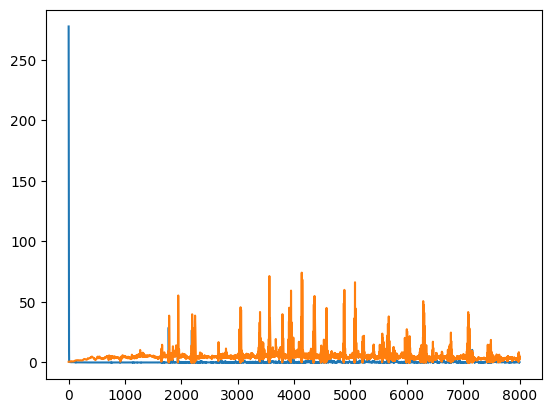

In [66]:
# size of the latent space
latent_dim = 10
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

In [94]:
from keras.models import load_model
model = load_model('trained_generated_model_20210205_v3.h5')

In [95]:
latent_points = generate_latent_points(10, 1000)

In [96]:
x = model.predict(latent_points)

32/32 [==============================] - 0s 2ms/step


In [97]:
data_fake = pd.DataFrame(data = x, columns = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker','class'] )

In [98]:
data_fake

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,5.133169,4.140886,3.951009,11.553887,1610.845337,0.828865,6.080167,23.901117,-4.972814,-1.738051,...,4.983933,52.449333,-7.111989,3.698286,13.234691,3.071487,8.863971,0.961745,-9.090487,-4.691454
1,4.627469,4.429501,3.228461,10.670802,1455.034058,0.825115,5.744471,22.135431,-4.525305,-1.720808,...,4.709955,47.867786,-7.432957,3.412426,12.333967,2.992425,8.125786,0.485947,-8.603874,-4.063521
2,5.138798,3.893654,3.848464,11.348044,1610.692993,0.520325,5.891834,23.470251,-5.060512,-1.704081,...,5.280885,51.947727,-7.236906,3.652494,13.137807,3.061123,8.792830,0.960117,-8.976009,-4.689400
3,4.985709,4.307480,3.564682,11.490328,1568.176758,0.863393,6.137319,23.617796,-4.853621,-1.989049,...,5.066941,51.291100,-7.531088,3.600115,13.032453,3.131765,8.677507,1.038935,-9.214656,-4.501853
4,4.496241,4.199122,3.273487,10.609622,1461.241455,0.911286,5.692355,22.050264,-4.630431,-1.865009,...,4.637676,47.893368,-7.095475,3.371293,12.118287,2.981068,8.284503,0.852743,-8.477205,-4.307839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.471299,4.711040,4.004365,12.241464,1728.989868,1.108141,6.491109,25.509720,-5.590954,-1.988107,...,5.290015,56.738457,-7.821335,3.861814,13.875680,3.365595,9.534387,1.332695,-9.504174,-5.280438
996,7.274183,6.690007,5.141728,16.252878,2305.366455,1.122846,8.629915,34.533089,-7.189214,-2.727593,...,6.997534,75.742874,-10.824067,5.136914,18.817070,4.950977,12.906935,1.481989,-12.565255,-6.636995
997,4.351352,3.733518,3.146311,9.967992,1375.849243,0.692350,5.260531,20.580198,-4.329259,-1.605421,...,4.555250,44.904392,-6.601368,3.116026,11.453197,2.670820,7.613018,0.792512,-8.008985,-3.923606
998,4.894027,4.578916,3.436085,11.050784,1512.339355,0.629448,5.965914,23.046776,-4.445854,-1.693084,...,4.807982,49.545315,-7.802402,3.679169,12.997125,3.314521,8.388875,0.428804,-8.845524,-4.025000


In [99]:
data_fake['class'].min()

-9.877766

In [100]:
data_fake['class'].max()

-2.9489002

In [101]:
class_mean = data_fake['class'].mean()

In [102]:
data_fake['class'] = data_fake['class'] > class_mean

In [103]:
data_fake['class']

0       True
1       True
2       True
3       True
4       True
       ...  
995    False
996    False
997     True
998     True
999     True
Name: class, Length: 1000, dtype: bool

In [104]:
data_fake['class'] = data_fake['class'].astype(int)

In [105]:
data_fake.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,5.133169,4.140886,3.951009,11.553887,1610.845337,0.828865,6.080167,23.901117,-4.972814,-1.738051,...,4.983933,52.449333,-7.111989,3.698286,13.234691,3.071487,8.863971,0.961745,-9.090487,1
1,4.627469,4.429501,3.228461,10.670802,1455.034058,0.825115,5.744471,22.135431,-4.525305,-1.720808,...,4.709955,47.867786,-7.432957,3.412426,12.333967,2.992425,8.125786,0.485947,-8.603874,1
2,5.138798,3.893654,3.848464,11.348044,1610.692993,0.520325,5.891834,23.470251,-5.060512,-1.704081,...,5.280885,51.947727,-7.236906,3.652494,13.137807,3.061123,8.792830,0.960117,-8.976009,1
3,4.985709,4.307480,3.564682,11.490328,1568.176758,0.863393,6.137319,23.617796,-4.853621,-1.989049,...,5.066941,51.291100,-7.531088,3.600115,13.032453,3.131765,8.677507,1.038935,-9.214656,1
4,4.496241,4.199122,3.273487,10.609622,1461.241455,0.911286,5.692355,22.050264,-4.630431,-1.865009,...,4.637676,47.893368,-7.095475,3.371293,12.118287,2.981068,8.284503,0.852743,-8.477205,1


In [106]:

x_fake_created = data_fake[features]
y_fake_created = data_fake[label]

In [80]:
x_fake_train, x_fake_test, y_fake_train, y_fake_test = train_test_split(x_fake_created, y_fake_created, test_size=0.30, random_state=42)
clf_fake = RandomForestClassifier(n_estimators=1000)
clf_fake.fit(x_fake_train, y_fake_train)

y_fake_pred = clf_fake.predict(x_fake_test)
print("Accuracy of fake data model: ", metrics.accuracy_score(y_fake_test, y_fake_pred))
print("Classification report of fake data model: ", metrics.classification_report(y_fake_test, y_fake_pred))

C:\Users\arnab\AppData\Local\Temp\ipykernel_9472\675810085.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_fake.fit(x_fake_train, y_fake_train)


Accuracy of fake data model:  0.9533333333333334
Classification report of fake data model:                precision    recall  f1-score   support

           0       0.94      0.97      0.95       145
           1       0.97      0.94      0.95       155

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [107]:
x_final = x[:, :20]
print('x_final: ', x_final[:3])

y_final = x[:, :]
print('y_final: ', y_final[:3])

x_final:  [[ 5.1331687e+00  4.1408863e+00  3.9510090e+00  1.1553887e+01
   1.6108453e+03  8.2886487e-01  6.0801673e+00  2.3901117e+01
  -4.9728136e+00 -1.7380513e+00 -4.6162262e+00  4.9839334e+00
   5.2449333e+01 -7.1119890e+00  3.6982861e+00  1.3234691e+01
   3.0714874e+00  8.8639708e+00  9.6174508e-01 -9.0904875e+00]
 [ 4.6274691e+00  4.4295006e+00  3.2284613e+00  1.0670802e+01
   1.4550341e+03  8.2511461e-01  5.7444711e+00  2.2135431e+01
  -4.5253048e+00 -1.7208077e+00 -4.7637625e+00  4.7099552e+00
   4.7867786e+01 -7.4329567e+00  3.4124260e+00  1.2333967e+01
   2.9924250e+00  8.1257858e+00  4.8594743e-01 -8.6038742e+00]
 [ 5.1387982e+00  3.8936543e+00  3.8484635e+00  1.1348044e+01
   1.6106930e+03  5.2032495e-01  5.8918343e+00  2.3470251e+01
  -5.0605116e+00 -1.7040812e+00 -4.7018237e+00  5.2808852e+00
   5.1947727e+01 -7.2369056e+00  3.6524940e+00  1.3137807e+01
   3.0611229e+00  8.7928305e+00  9.6011668e-01 -8.9760094e+00]]
y_final:  [[ 5.1331687e+00  4.1408863e+00  3.9510090e+00

In [108]:
x = x[:, :20]

In [109]:
y_fake_pred = clf_true.predict(x)

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [110]:
y_fake_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [111]:
data_fake.shape

(1000, 21)

In [112]:
data.shape

(1000, 21)

In [113]:
data_fake.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,5.133169,4.140886,3.951009,11.553887,1610.845337,0.828865,6.080167,23.901117,-4.972814,-1.738051,...,4.983933,52.449333,-7.111989,3.698286,13.234691,3.071487,8.863971,0.961745,-9.090487,1
1,4.627469,4.429501,3.228461,10.670802,1455.034058,0.825115,5.744471,22.135431,-4.525305,-1.720808,...,4.709955,47.867786,-7.432957,3.412426,12.333967,2.992425,8.125786,0.485947,-8.603874,1
2,5.138798,3.893654,3.848464,11.348044,1610.692993,0.520325,5.891834,23.470251,-5.060512,-1.704081,...,5.280885,51.947727,-7.236906,3.652494,13.137807,3.061123,8.792830,0.960117,-8.976009,1
3,4.985709,4.307480,3.564682,11.490328,1568.176758,0.863393,6.137319,23.617796,-4.853621,-1.989049,...,5.066941,51.291100,-7.531088,3.600115,13.032453,3.131765,8.677507,1.038935,-9.214656,1
4,4.496241,4.199122,3.273487,10.609622,1461.241455,0.911286,5.692355,22.050264,-4.630431,-1.865009,...,4.637676,47.893368,-7.095475,3.371293,12.118287,2.981068,8.284503,0.852743,-8.477205,1


In [114]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [115]:


#x_fake=scaler.inverse_transform(x_fake_created)

data_fake=np.round(data_fake).astype(int)
data_fake=pd.DataFrame(data_fake,columns=data_fake.columns)
data_fake

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,5,4,4,12,1611,1,6,24,-5,-2,...,5,52,-7,4,13,3,9,1,-9,1
1,5,4,3,11,1455,1,6,22,-5,-2,...,5,48,-7,3,12,3,8,0,-9,1
2,5,4,4,11,1611,1,6,23,-5,-2,...,5,52,-7,4,13,3,9,1,-9,1
3,5,4,4,11,1568,1,6,24,-5,-2,...,5,51,-8,4,13,3,9,1,-9,1
4,4,4,3,11,1461,1,6,22,-5,-2,...,5,48,-7,3,12,3,8,1,-8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,5,4,12,1729,1,6,26,-6,-2,...,5,57,-8,4,14,3,10,1,-10,0
996,7,7,5,16,2305,1,9,35,-7,-3,...,7,76,-11,5,19,5,13,1,-13,0
997,4,4,3,10,1376,1,5,21,-4,-2,...,5,45,-7,3,11,3,8,1,-8,1
998,5,5,3,11,1512,1,6,23,-4,-2,...,5,50,-8,4,13,3,8,0,-9,1


In [116]:
data = pd.read_csv('german_credit_data.csv')


In [130]:

for col in cat_col:
    try:
        synthetic_data[col] = le.inverse_transform(x_r[col])
    except ValueError:
        unseen_labels = set(x_r[col]) - set(le.classes_)
        for label in unseen_labels:
            nearest_label = min(le.classes_, key=lambda x: abs(int(x) - label))
            x_r[col] = np.where(x_r[col] == label, nearest_label,x_r[col])
df=pd.concat([x_r,data_fake['class']],axis=1)            

ValueError: invalid literal for int() with base 10: 'no'

In [117]:
from table_evaluator import load_data, TableEvaluator

In [118]:
table_evaluator = TableEvaluator(data2, data_fake)

In [119]:
table_evaluator.evaluate(target_col='class')

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\metrics.py:95: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  distances = Parallel(n_jobs=-1)(



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.4550   0.9550              0.2987
DecisionTreeClassifier_real   0.6600   0.7050              0.4870
LogisticRegression_fake       0.4850   0.9600              0.3029
LogisticRegression_real       0.7350   0.3050              0.1494
MLPClassifier_fake            0.5150   0.5150              0.0152
MLPClassifier_real            0.7300   0.6700              0.8018
RandomForestClassifier_fake   0.5150   0.9600              0.3559
RandomForestClassifier_real   0.7450   0.7300              0.6327

Privacy results:
                                          result
Duplicate rows between sets (real/fake)  (0, 24)
nearest neighbor mean                    11.5897
nearest neighbor std                      0.6403

Miscellaneous results:
                                  Result
Column

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\metrics.py:121: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  distances = Parallel(n_jobs=-1)(


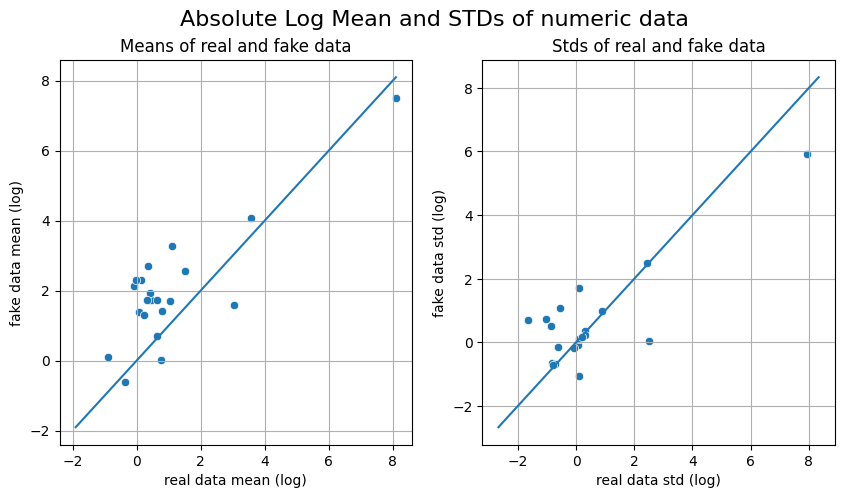

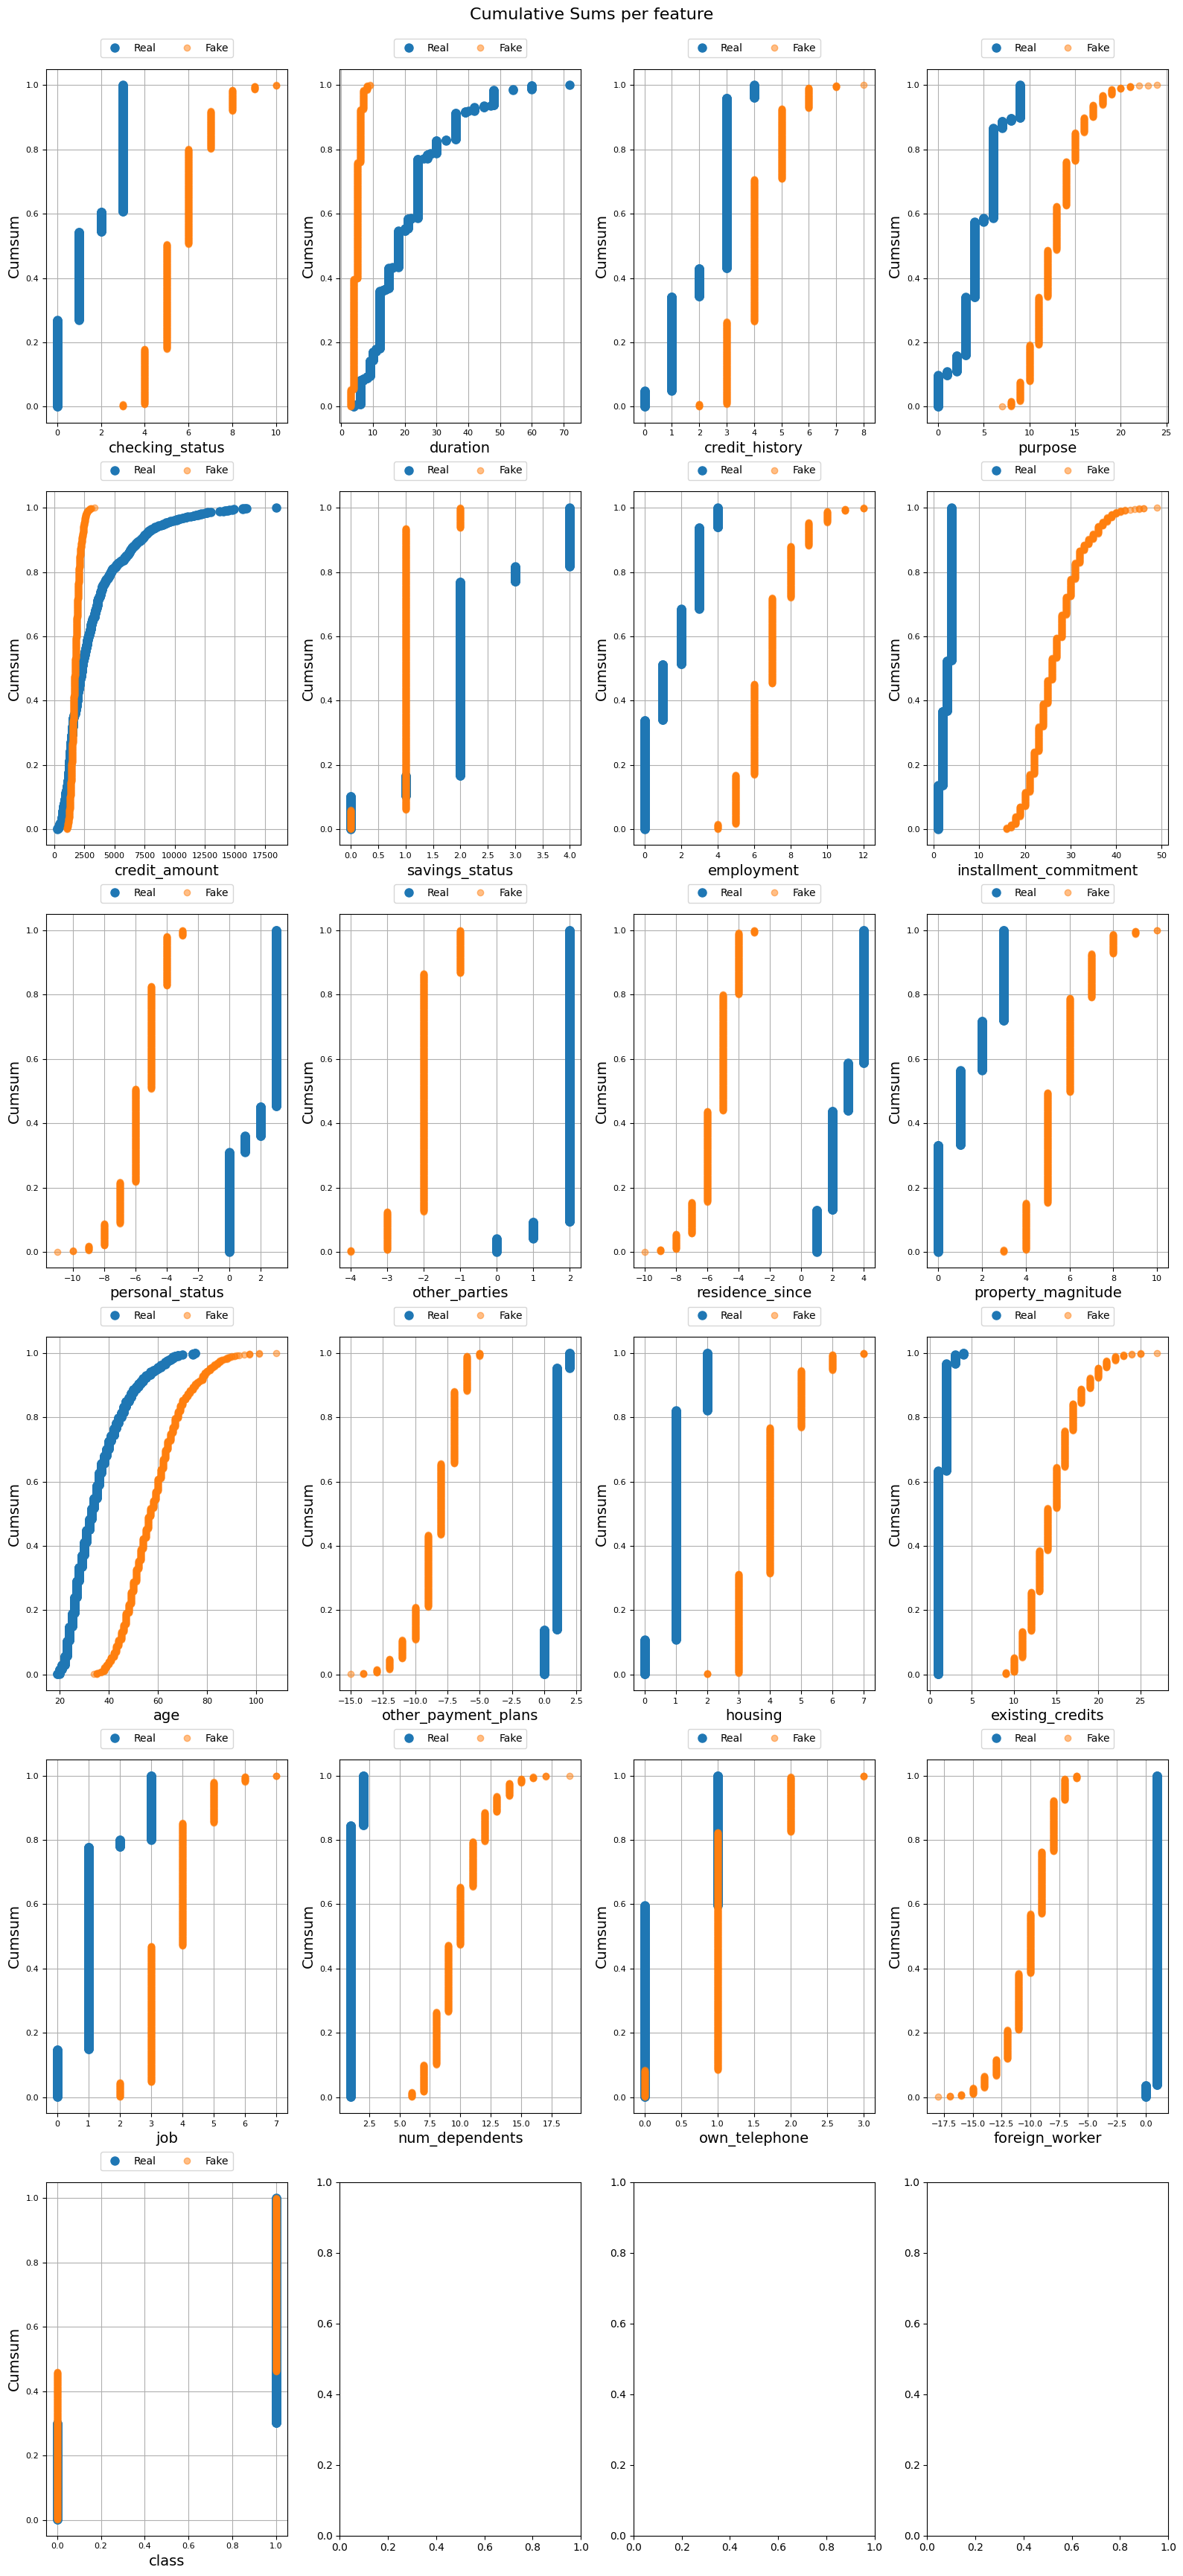

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

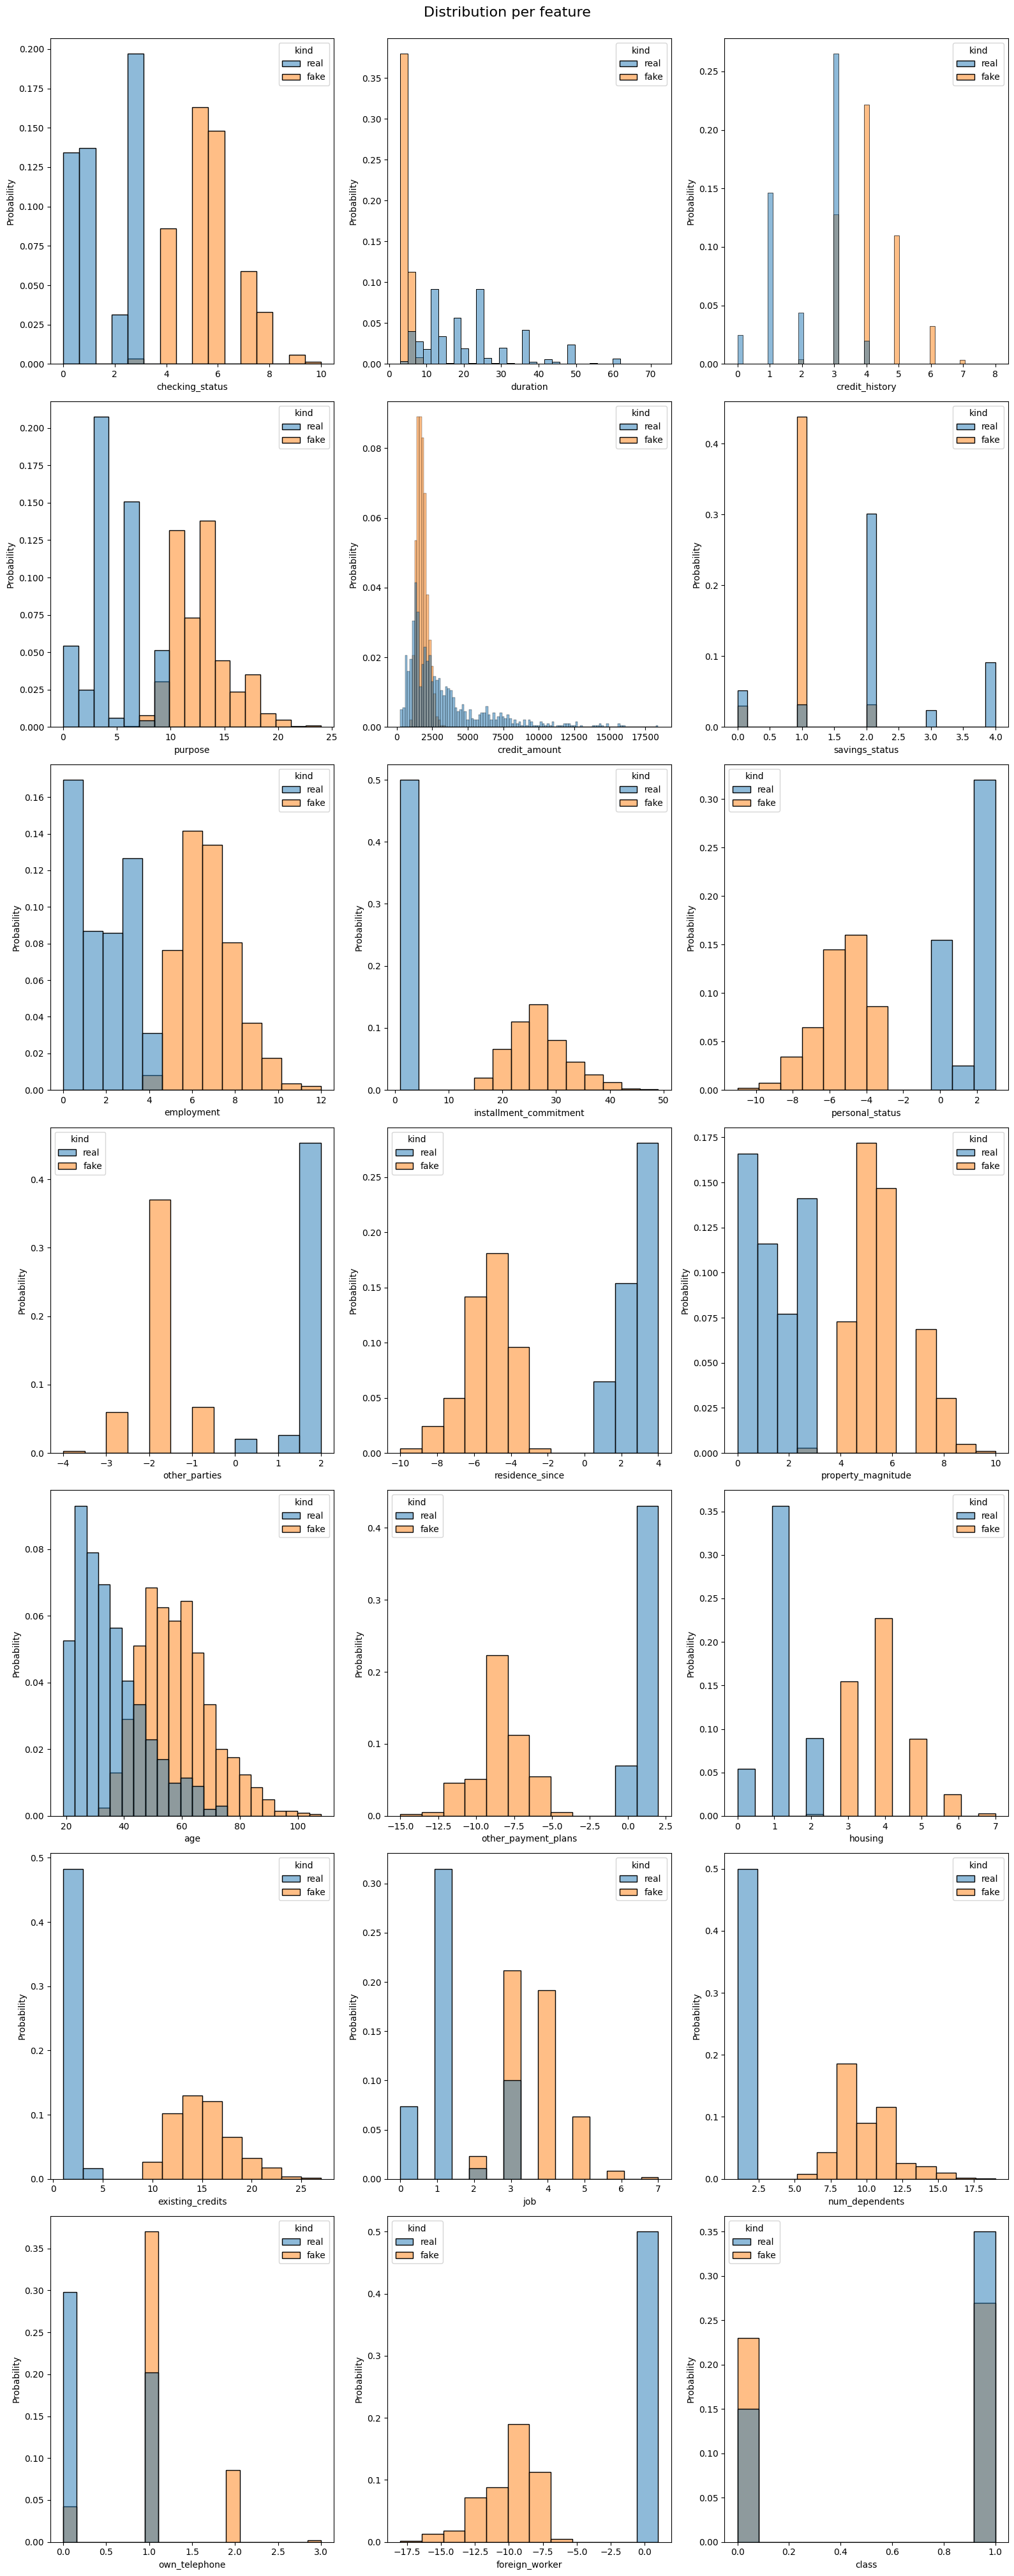

TypeError: Image data of dtype object cannot be converted to float

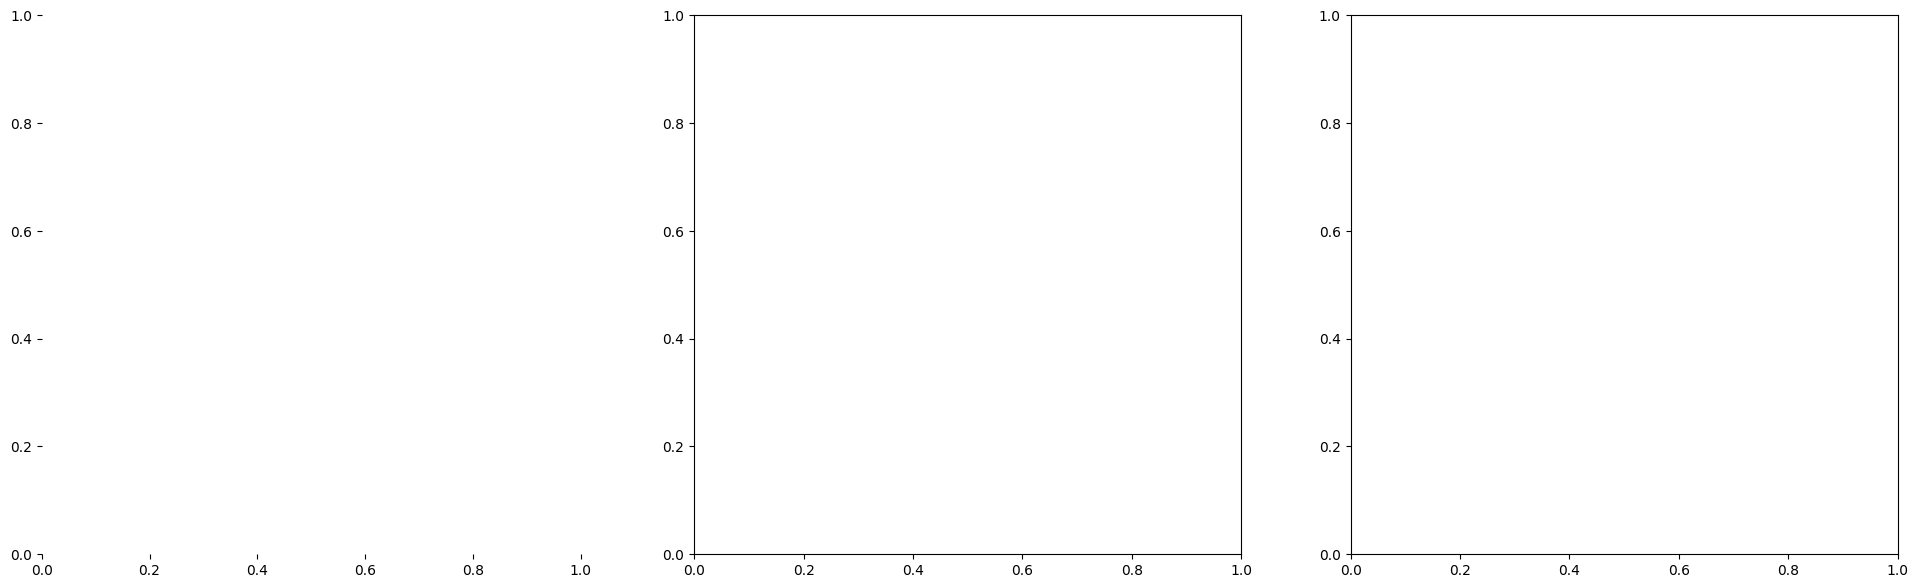

In [120]:
table_evaluator.visual_evaluation()